In [ ]:
#@title
from google.colab import files
import pandas as pd
import numpy as np
import io

import sweetviz as sv

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV


All libraries loaded


## Importamos el dataset

In [ ]:
uploaded = files.upload()

for filename in uploaded.keys():
    data = pd.read_excel(io.BytesIO(uploaded[filename]))

Saving 3datos (2).xlsx to 3datos (2) (3).xlsx


## Análisis exploratorio

Observamos las primeras filas del dataset

In [ ]:
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

Buscamos valores missing por columna

In [ ]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

La base está compuesta por 30000 observaciones. No se encuentran valores faltantes.

Observamos también cuáles variables tienen valores igual a cero

In [ ]:
columns_with_zeros = (data == 0).any()

print(columns_with_zeros[columns_with_zeros].index)

Index(['EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month'],
      dtype='object')


## Reporte de estadísticas descriptivas

Utilizando el paquete SweetViz generamos un reporte de estadísticas descriptivas.

                                             |          | [  0%]   00:00 -> (? left)


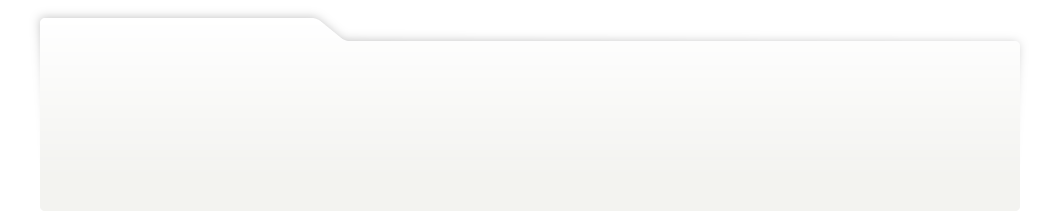
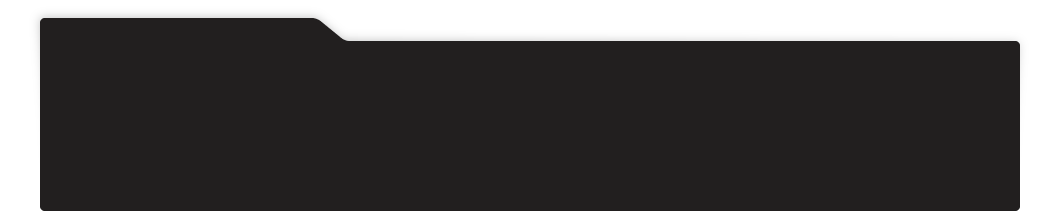
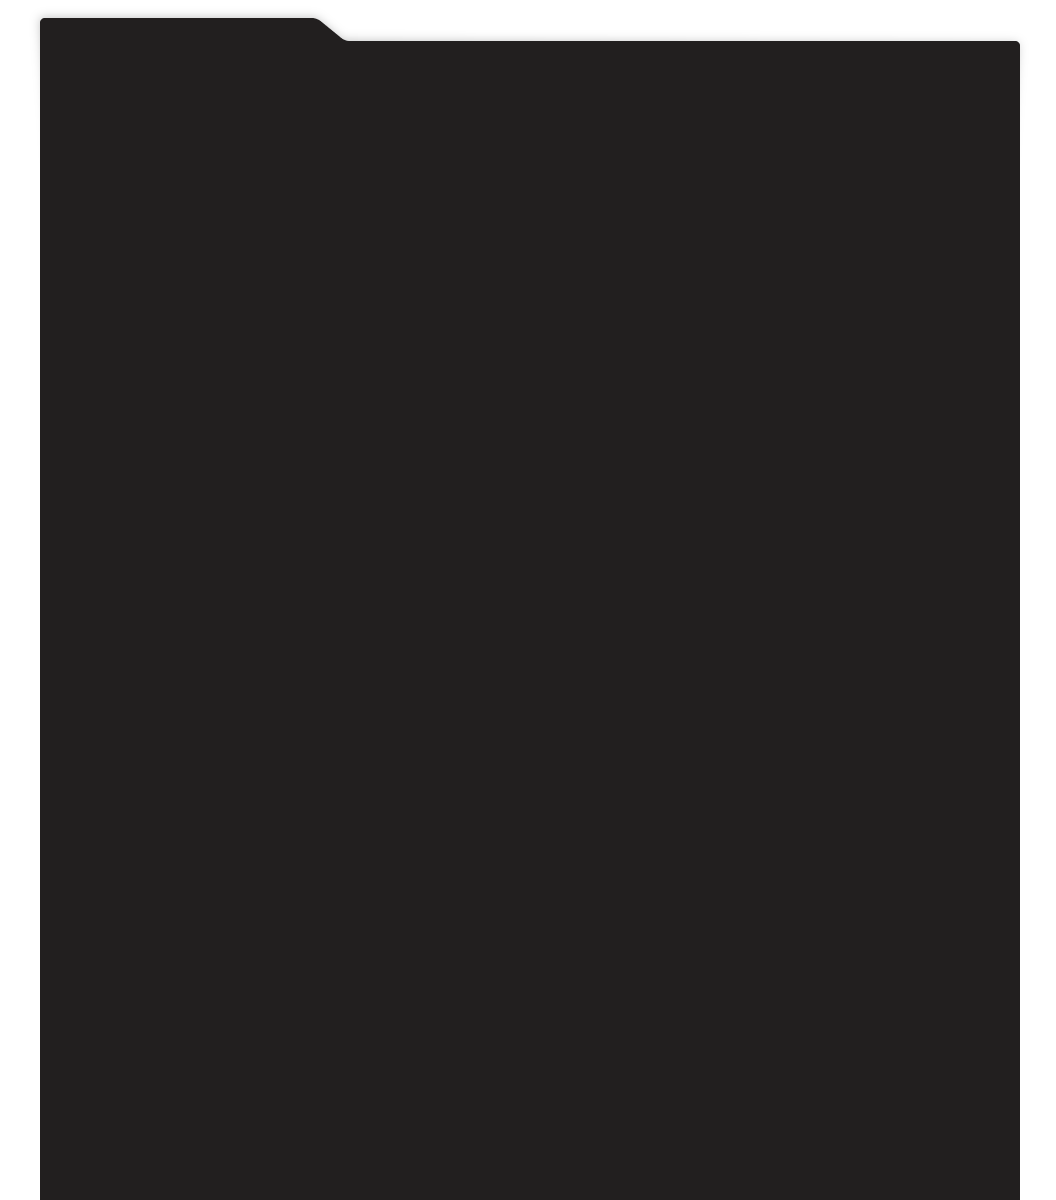
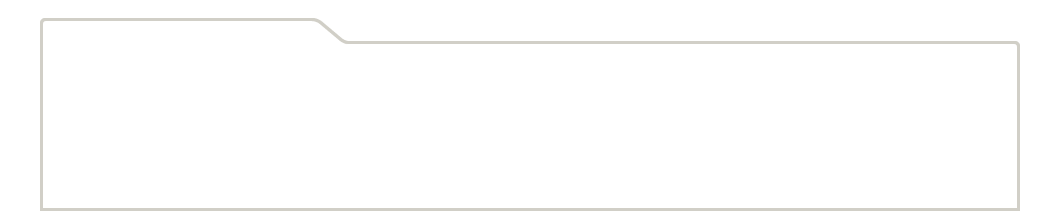
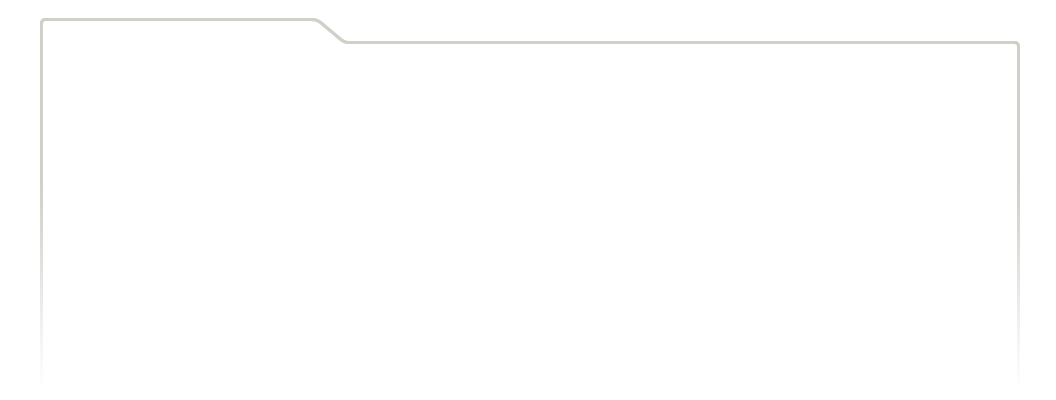
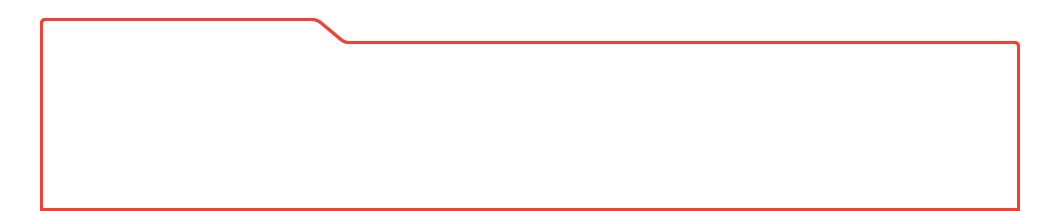
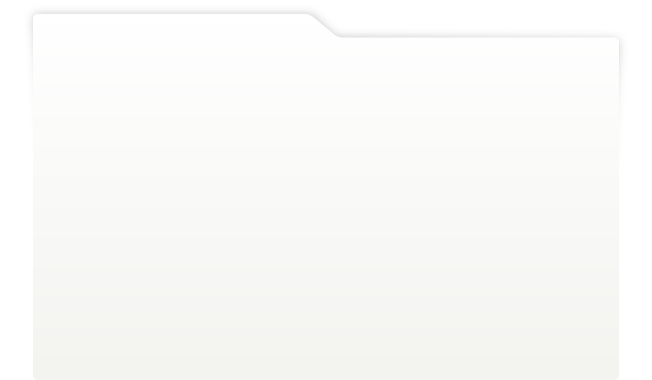
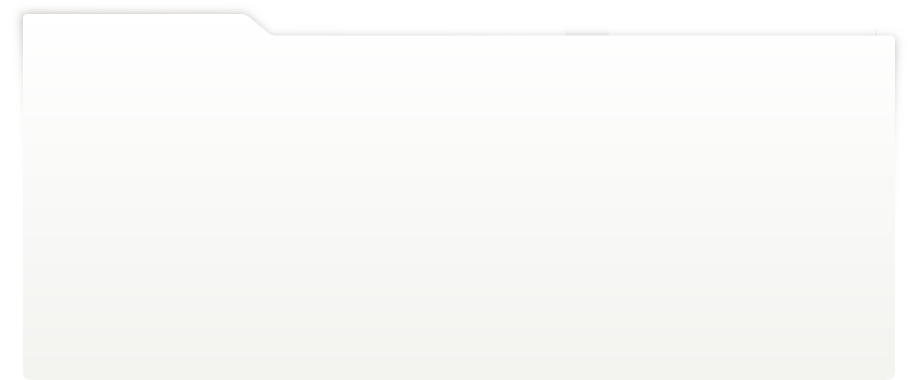
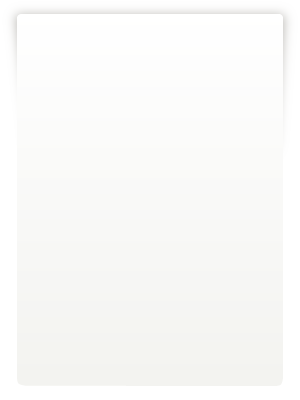
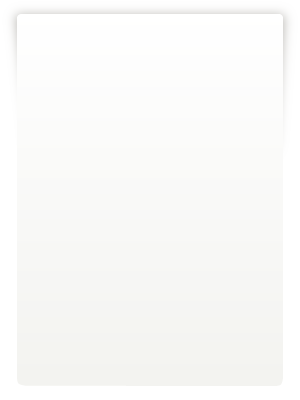
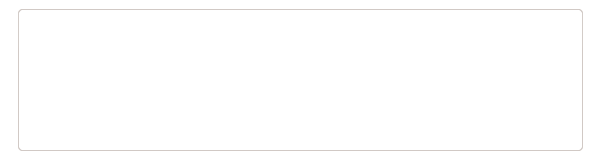
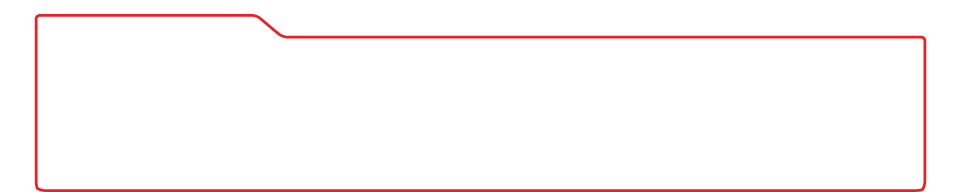
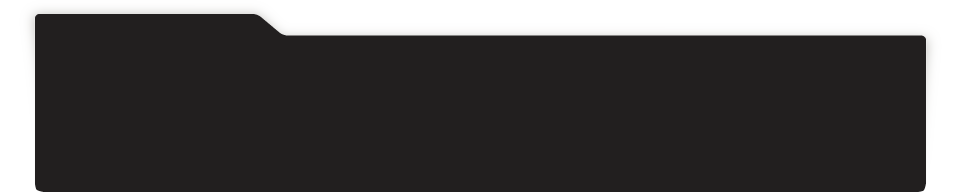
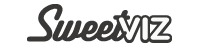
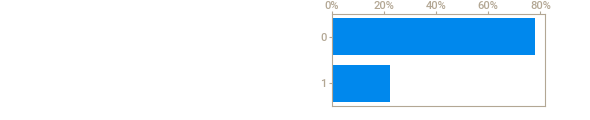
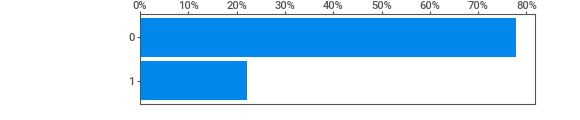
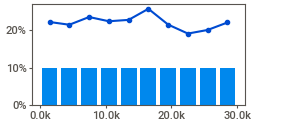
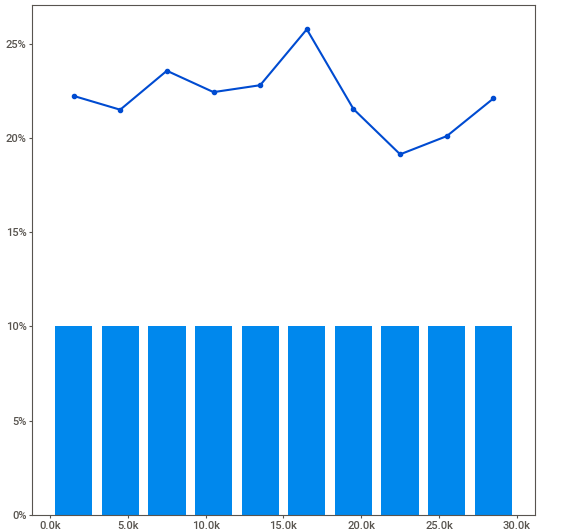
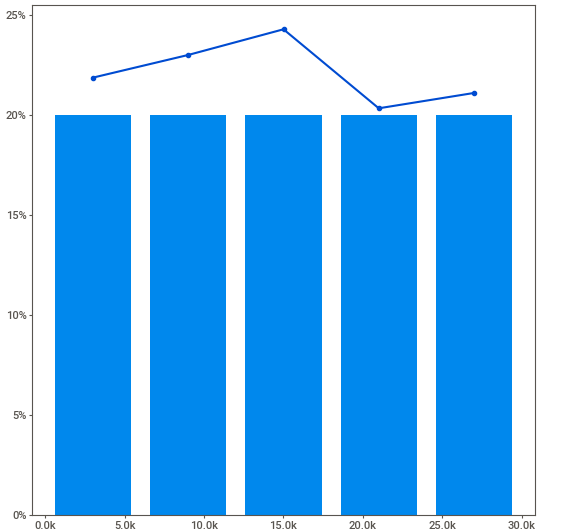
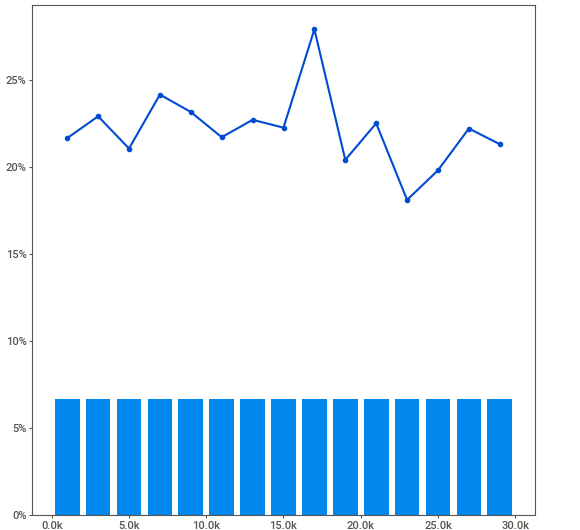
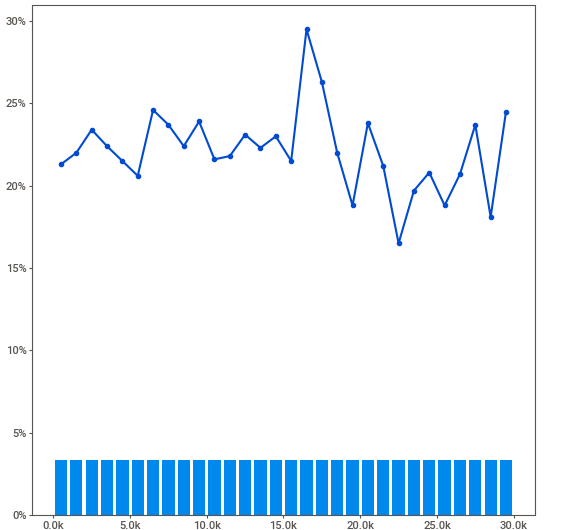
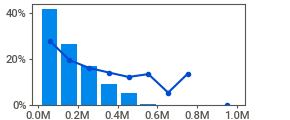
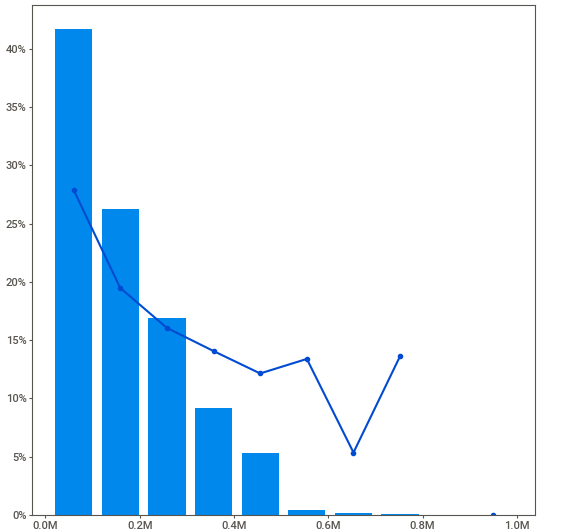
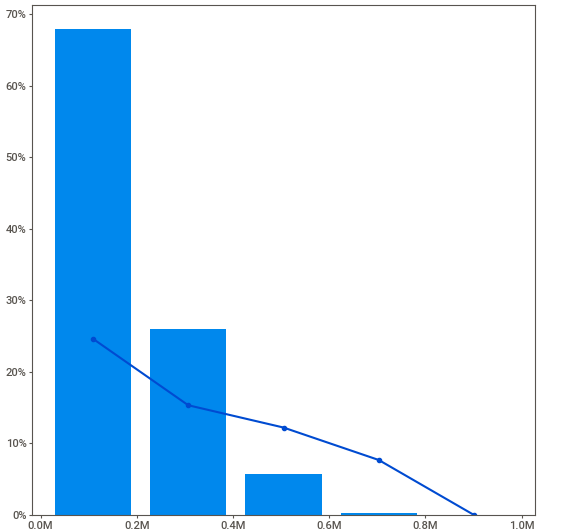
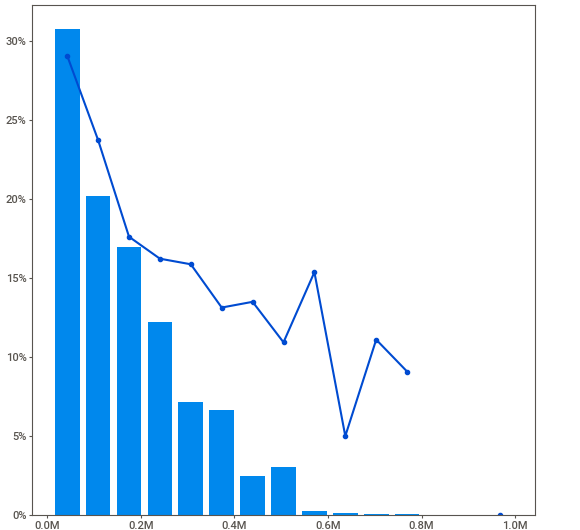
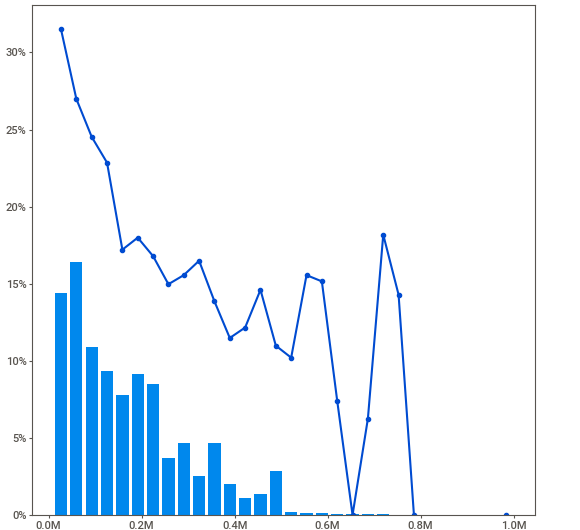
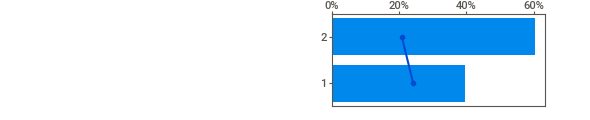
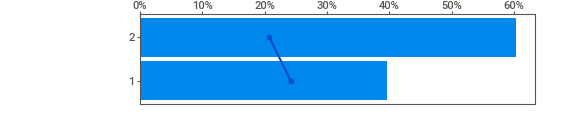
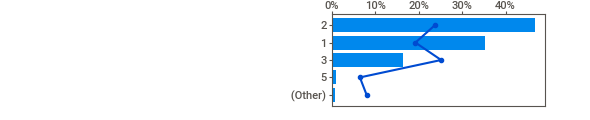
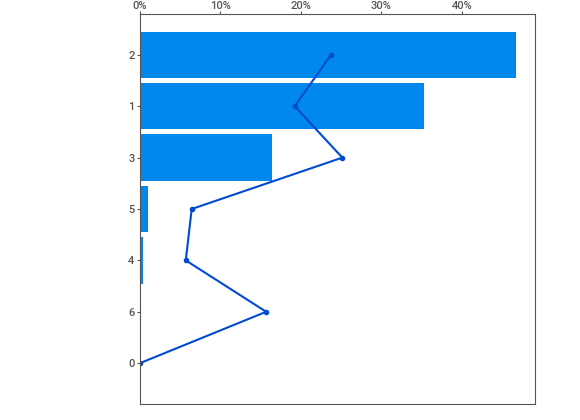
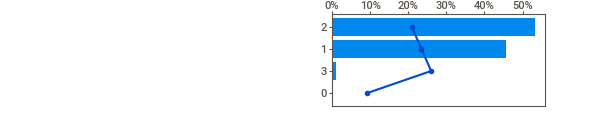
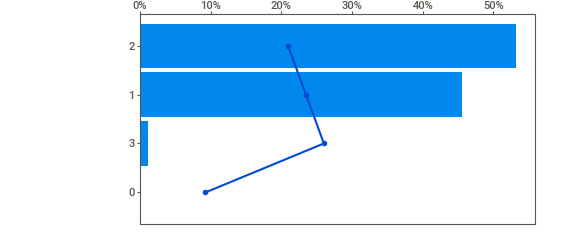
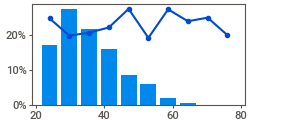
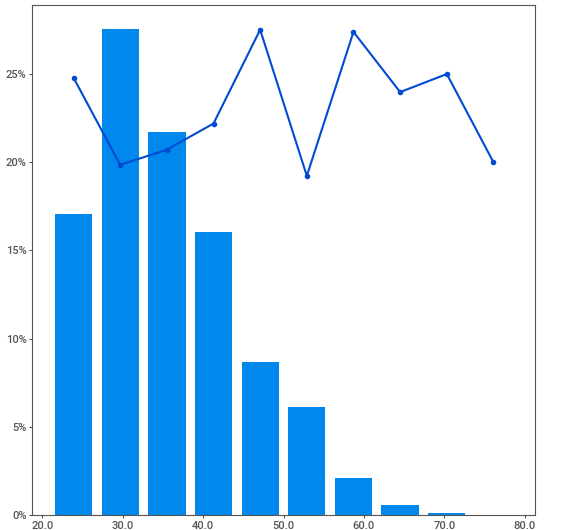
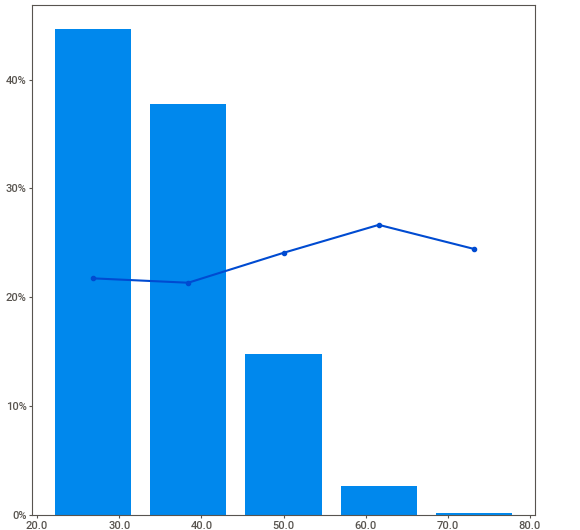
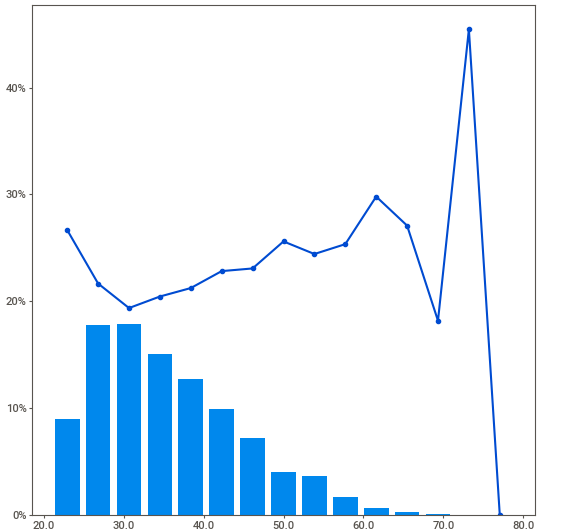
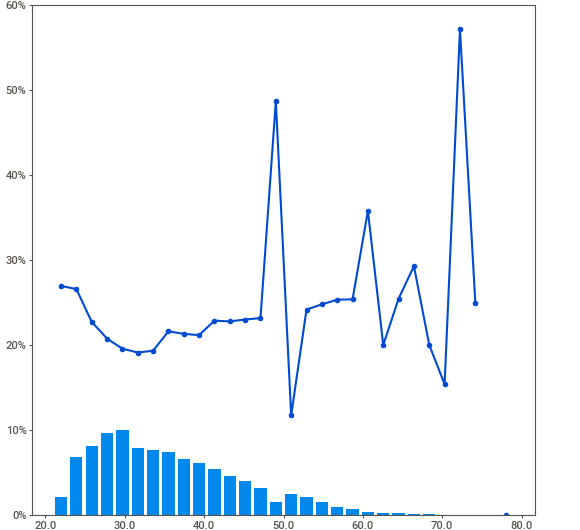
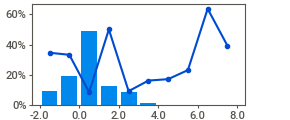
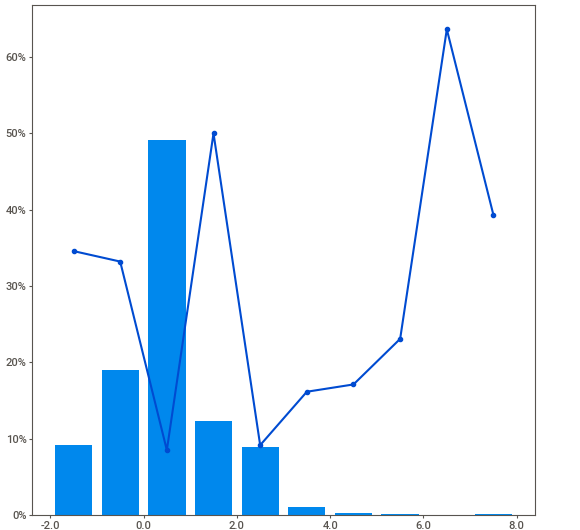
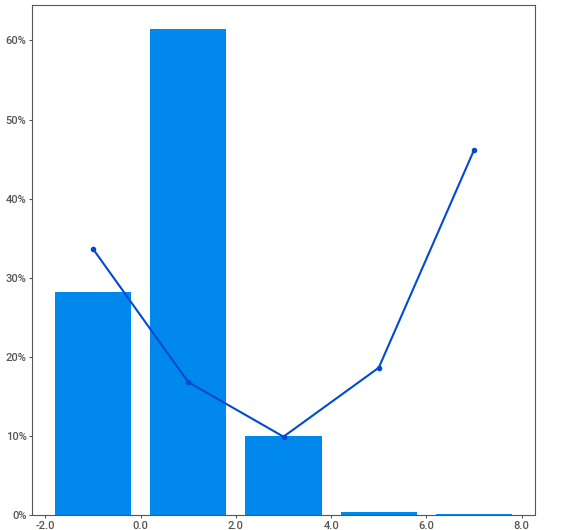
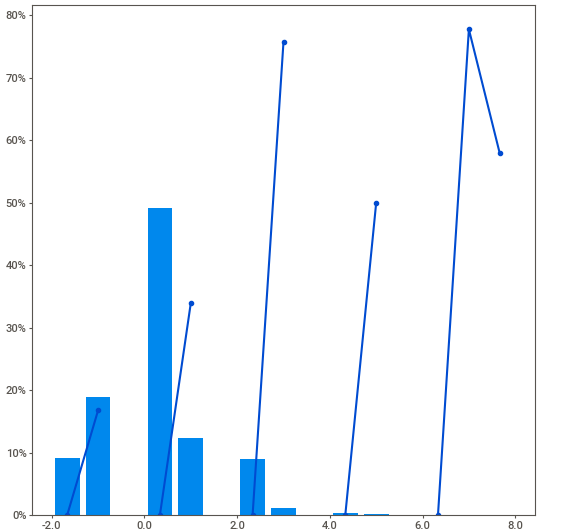
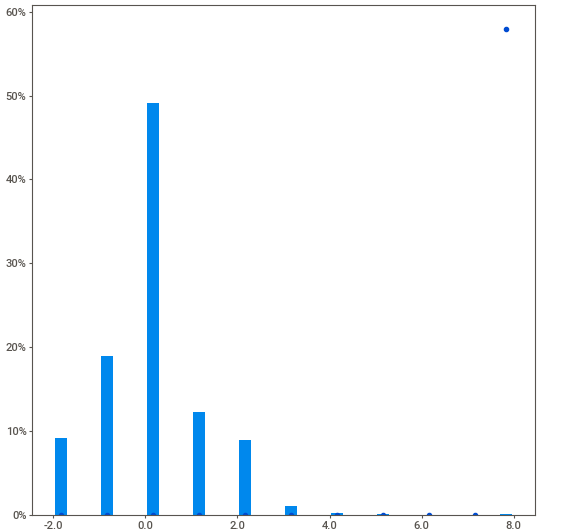
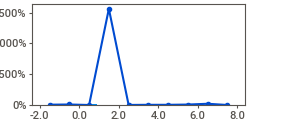
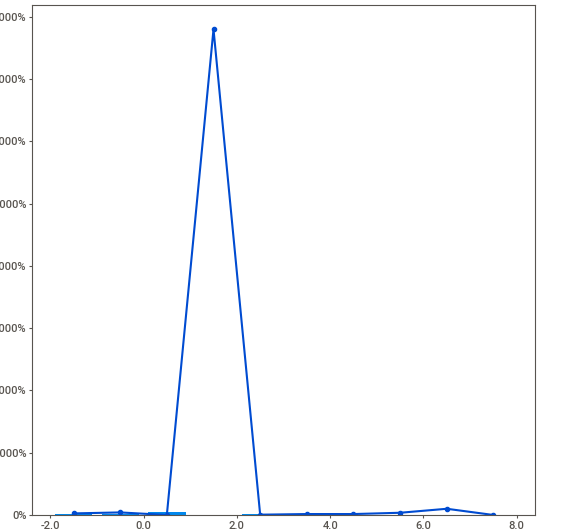
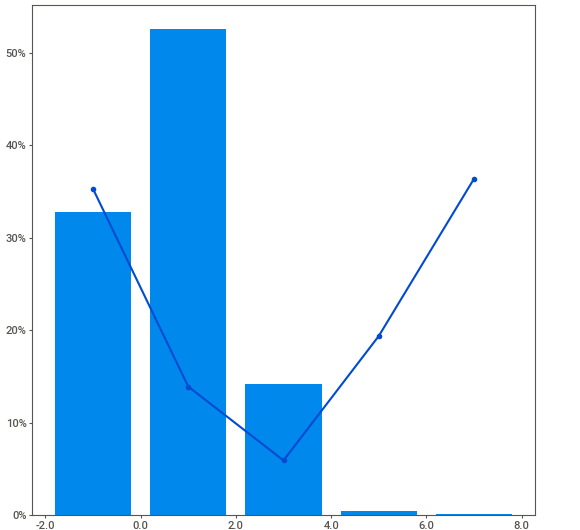
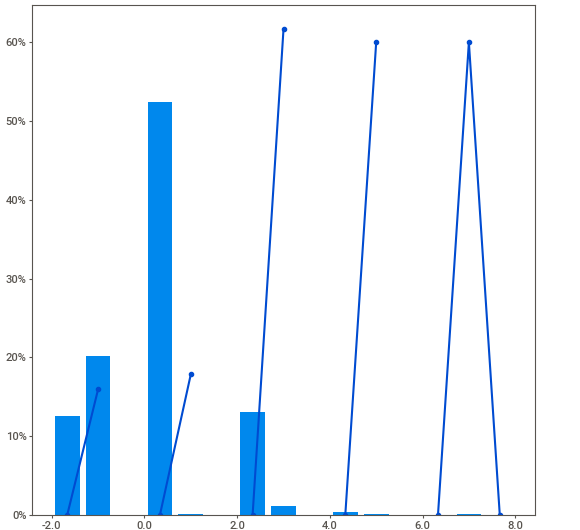
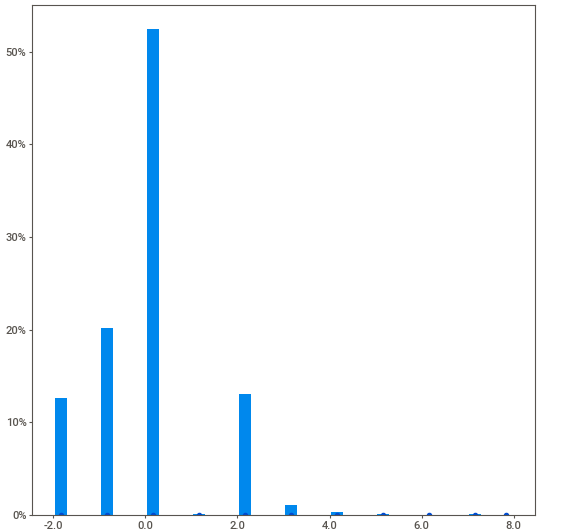
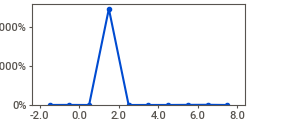
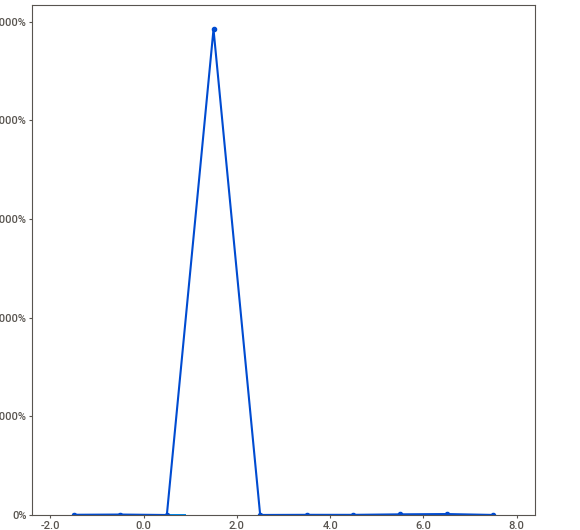
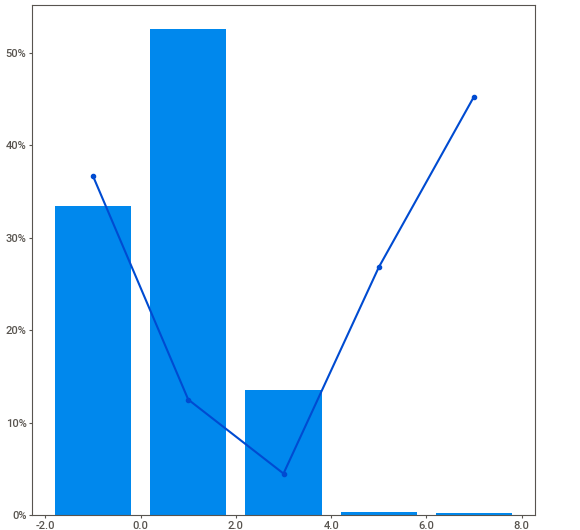
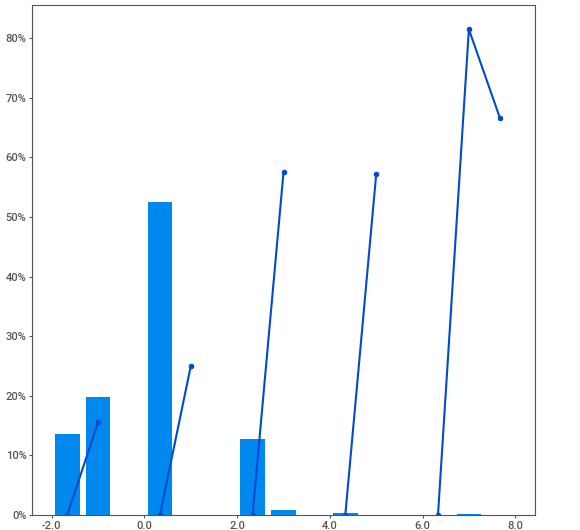
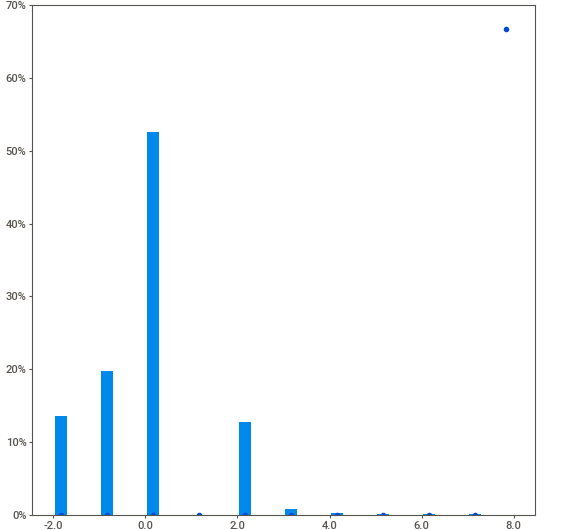
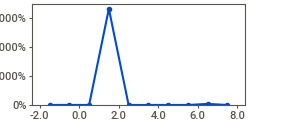
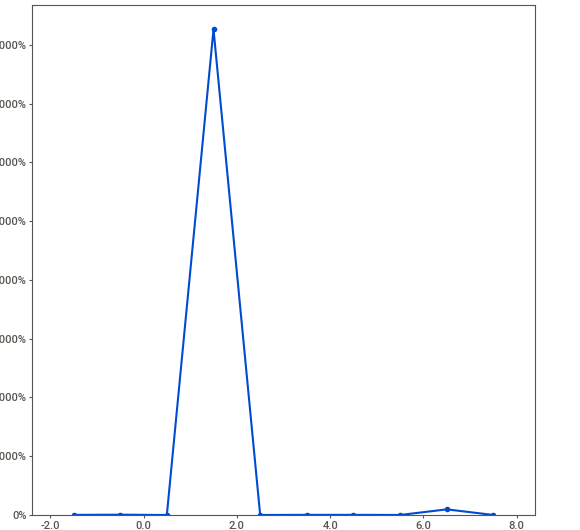
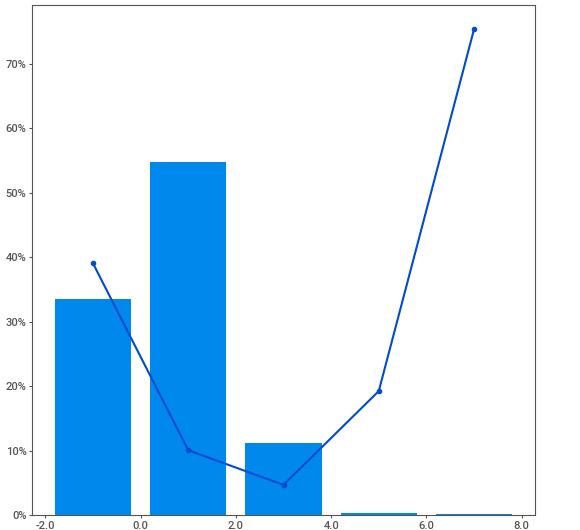
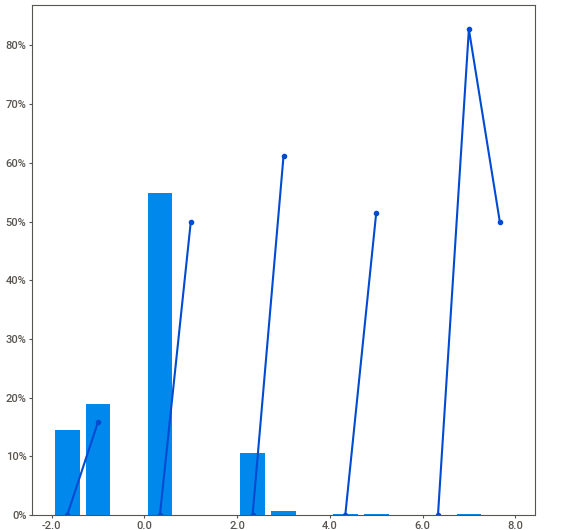
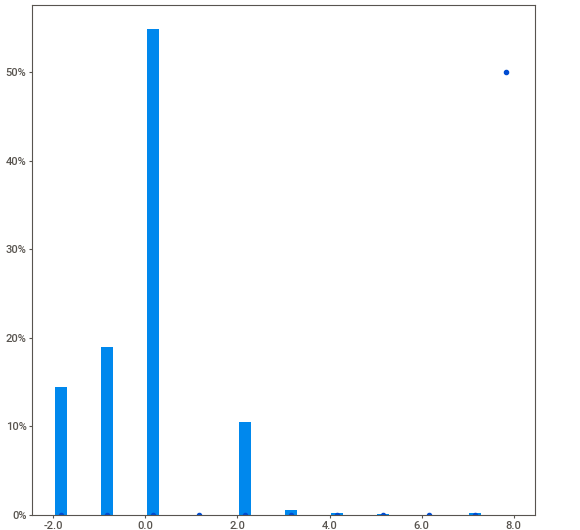
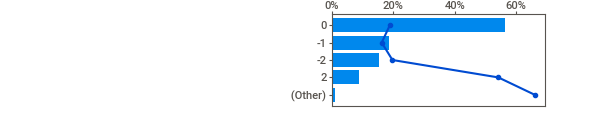
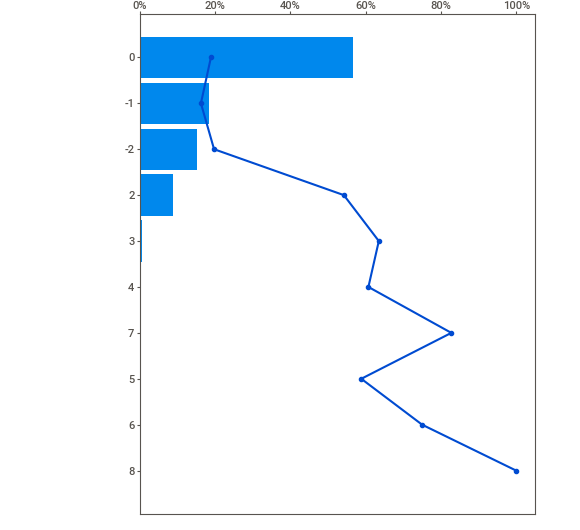
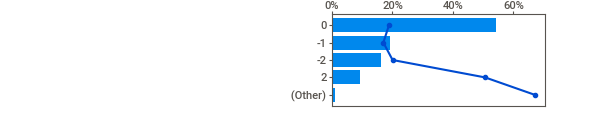
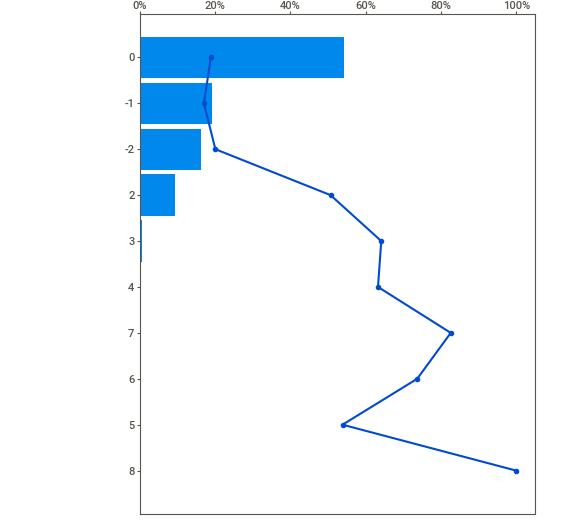
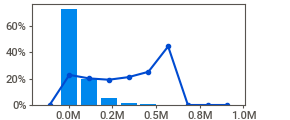
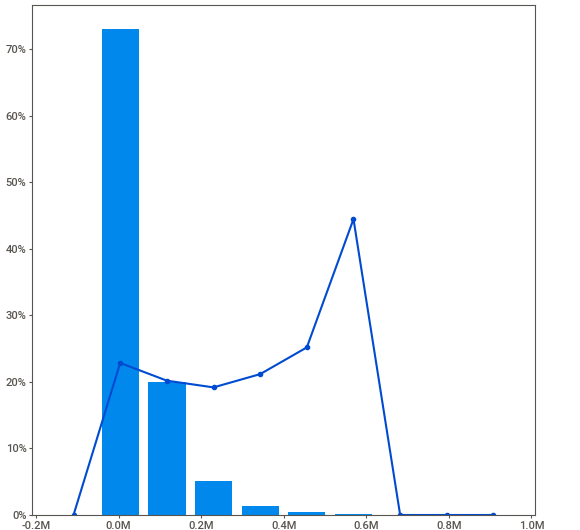
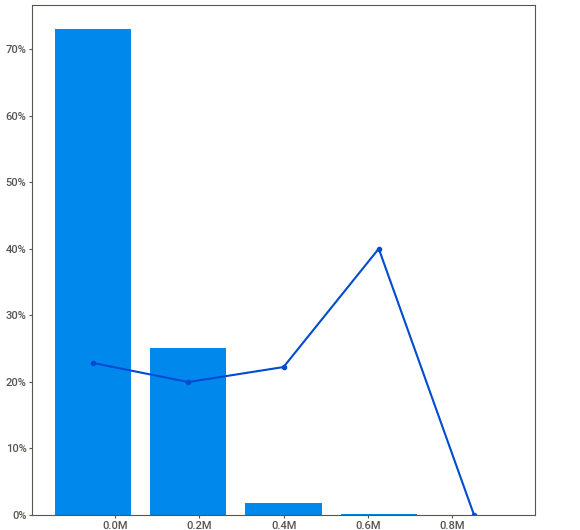
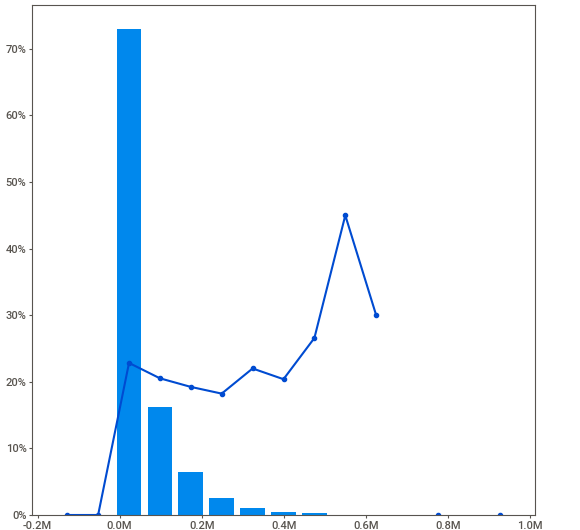
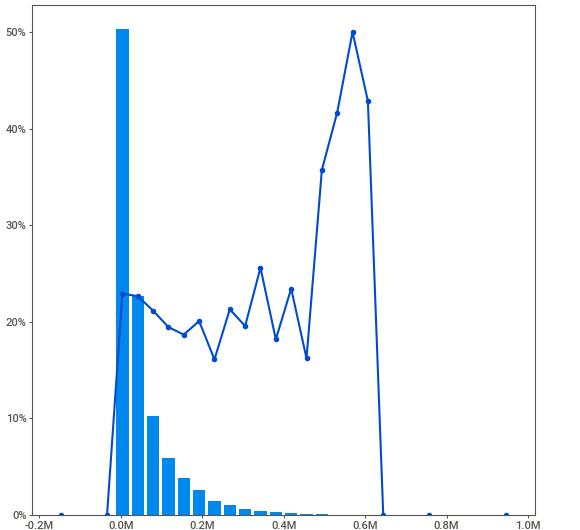
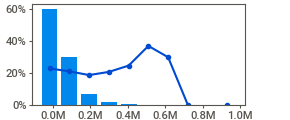
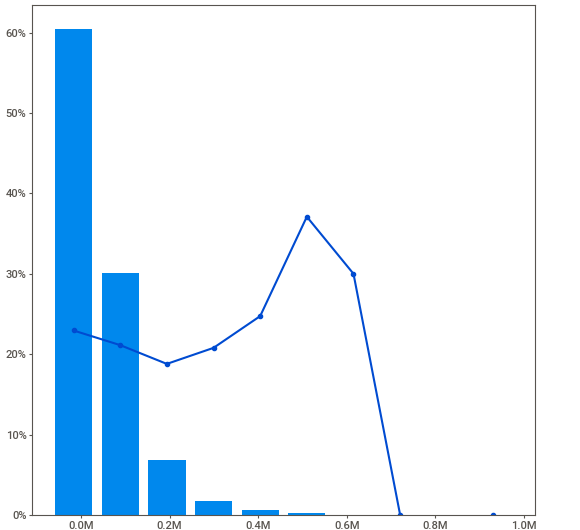
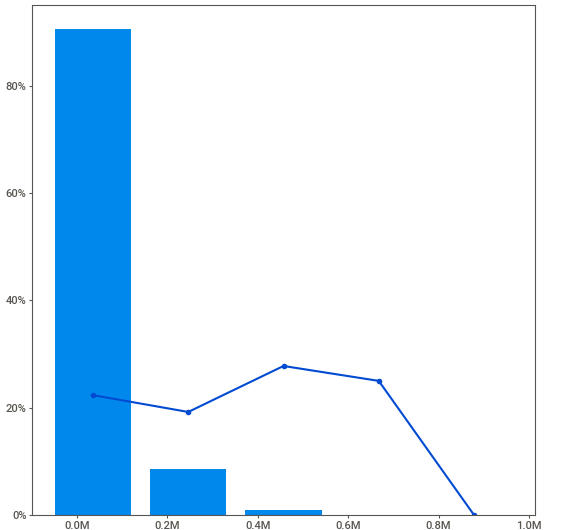
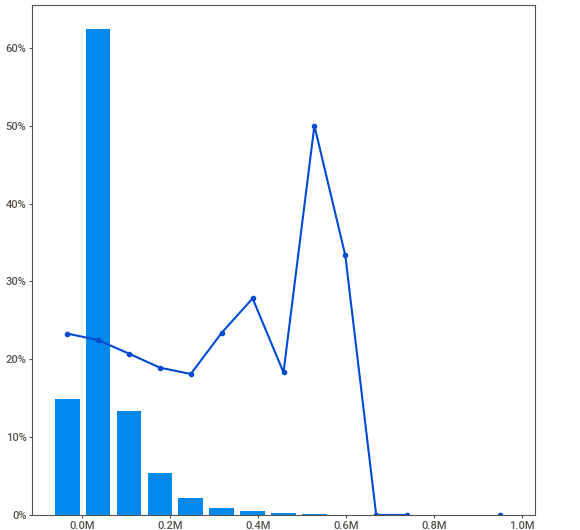
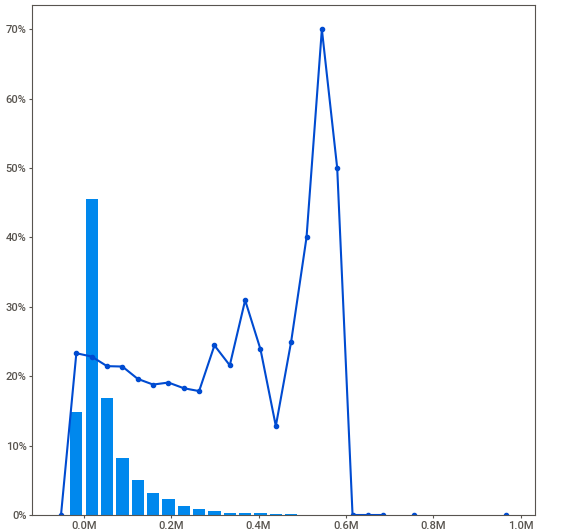
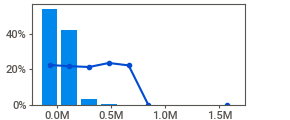
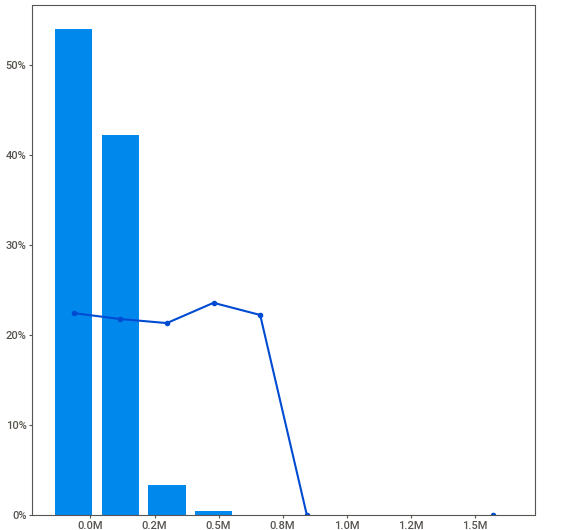
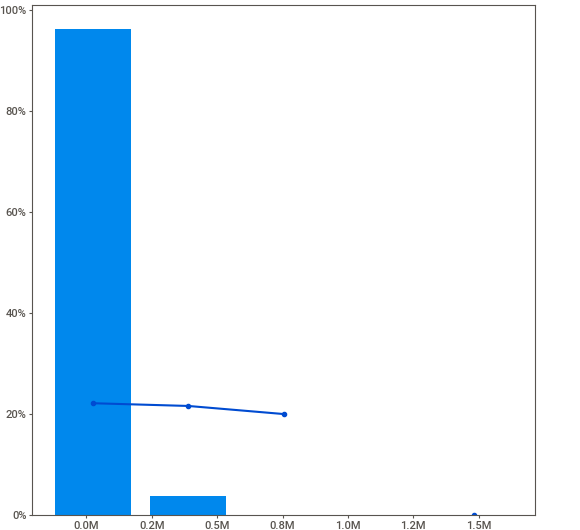
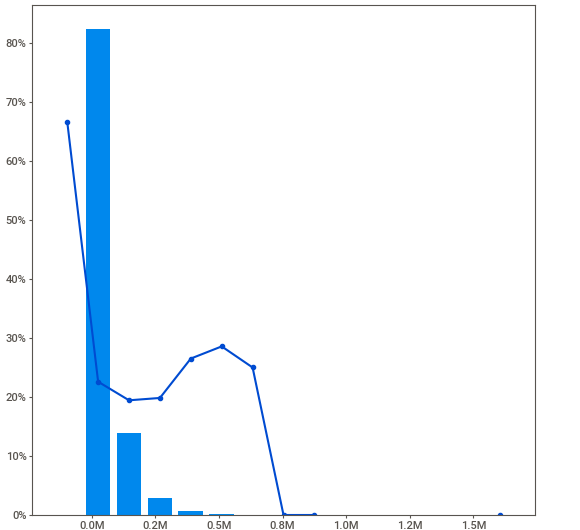
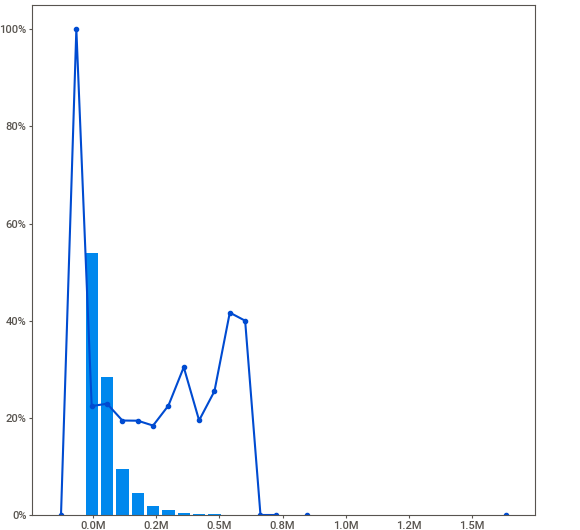
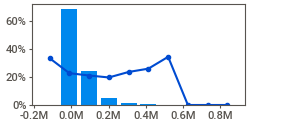
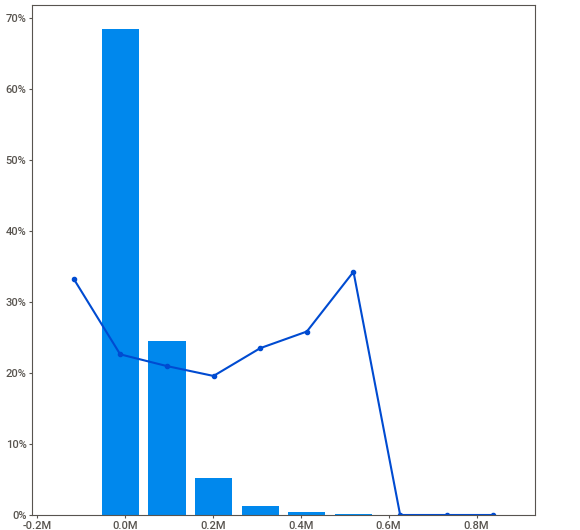
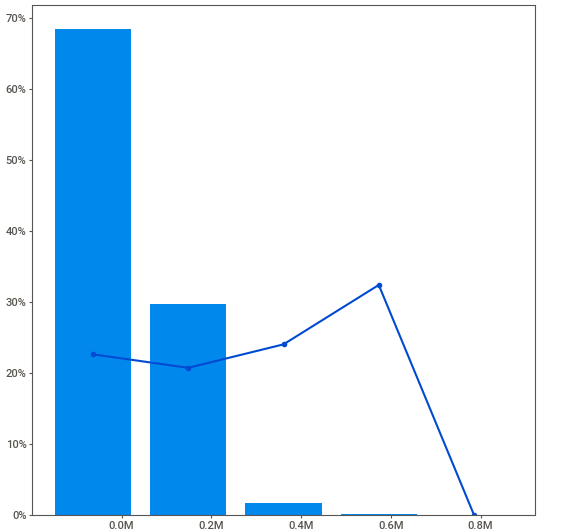
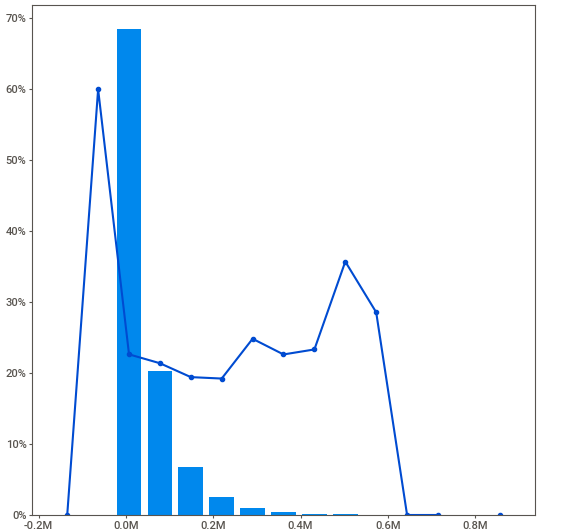
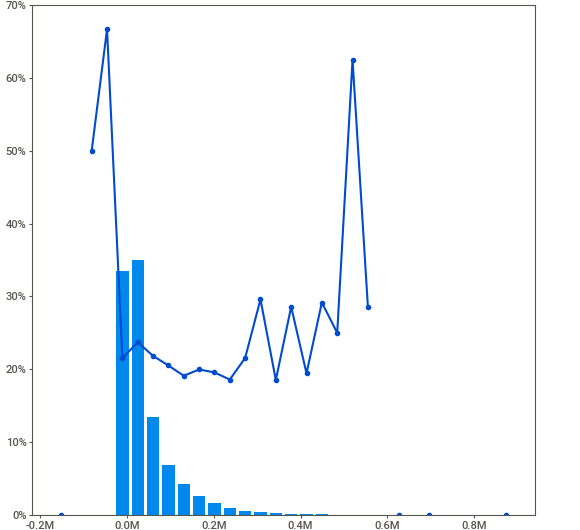
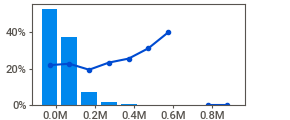
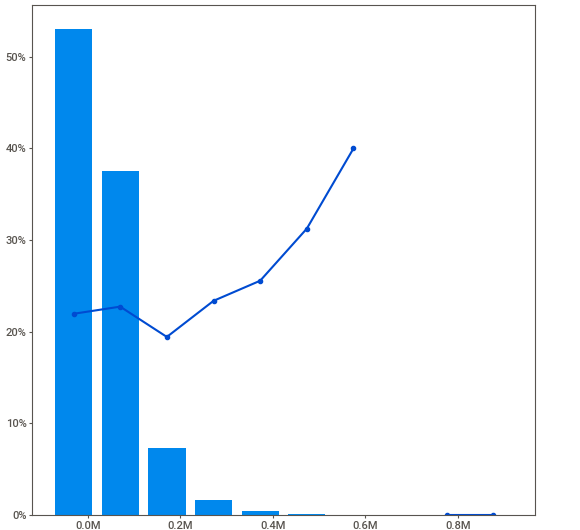
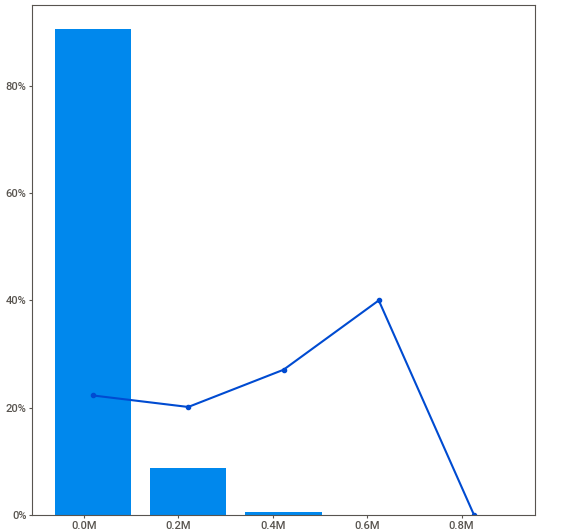
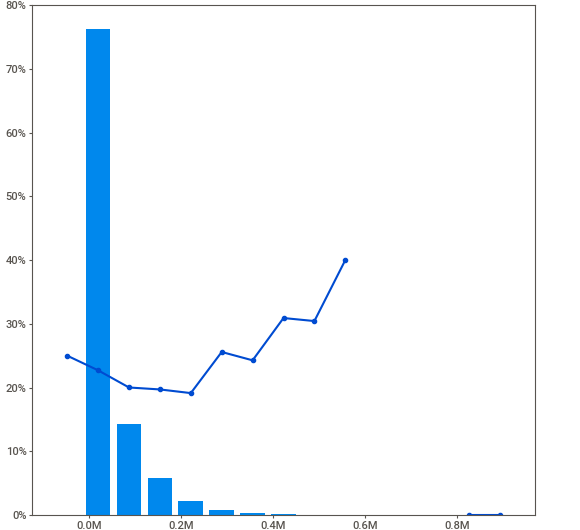
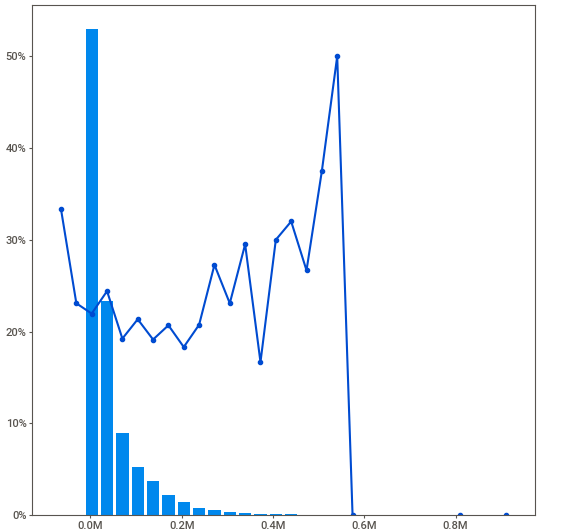
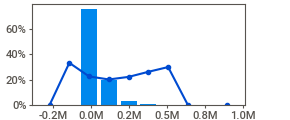
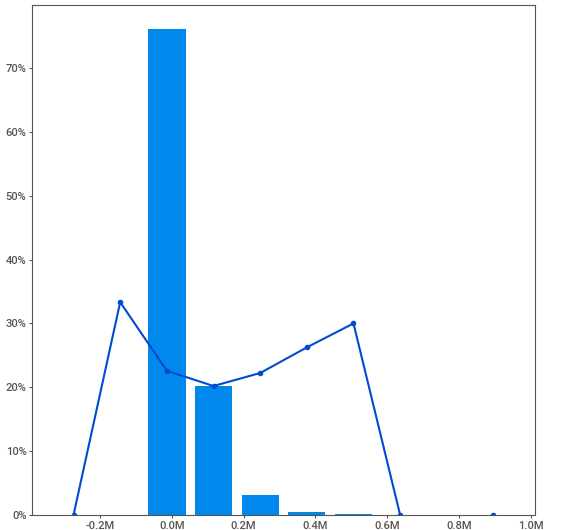
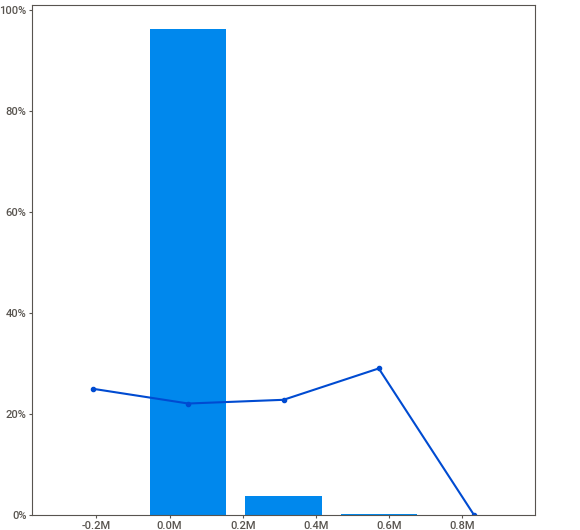
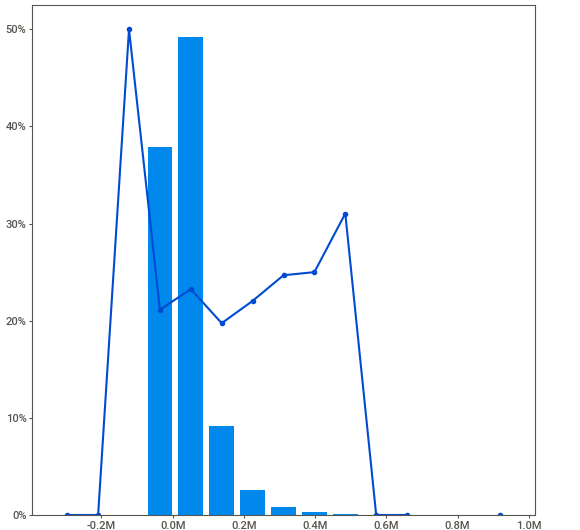
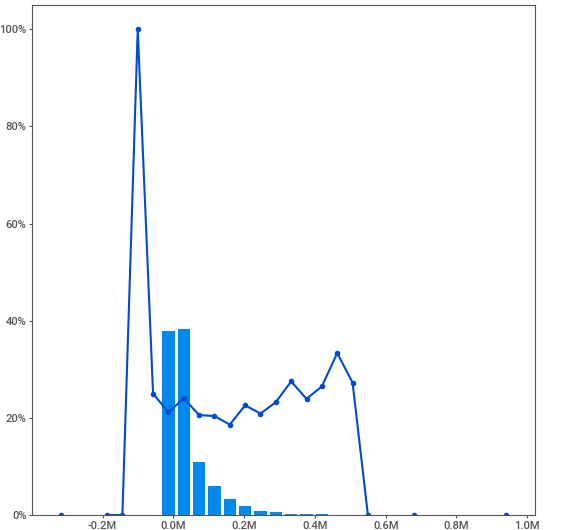
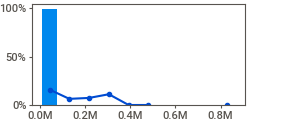
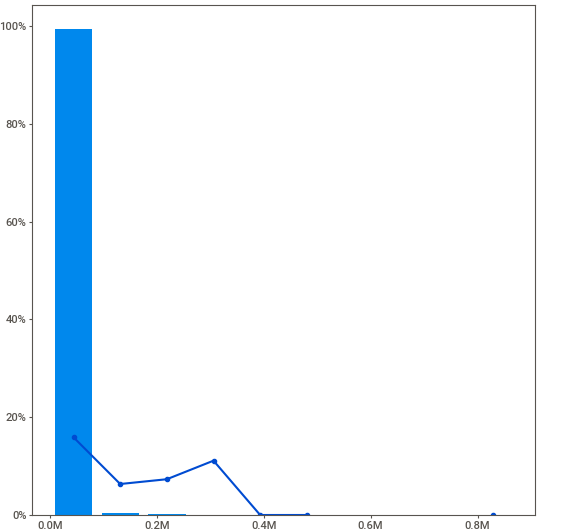
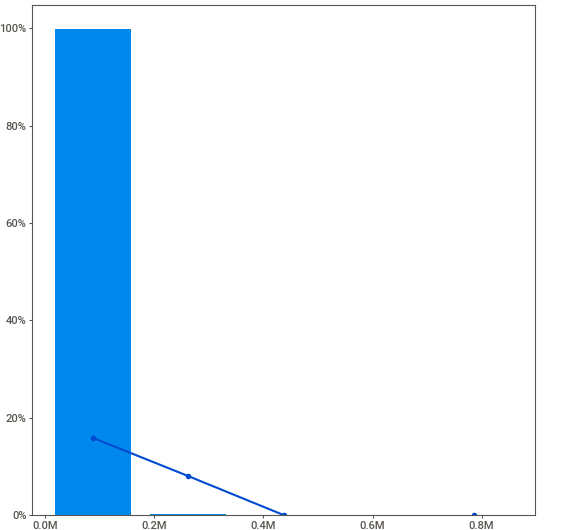
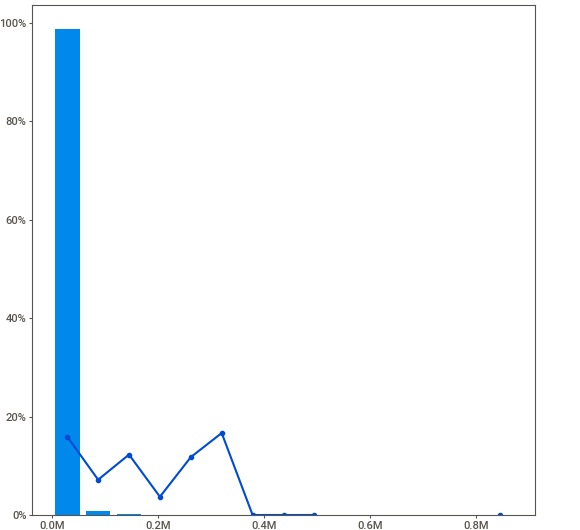
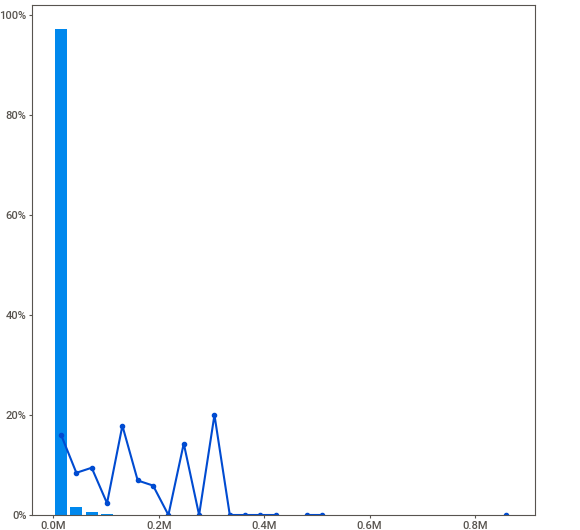
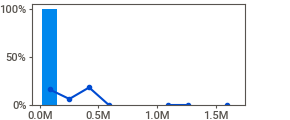
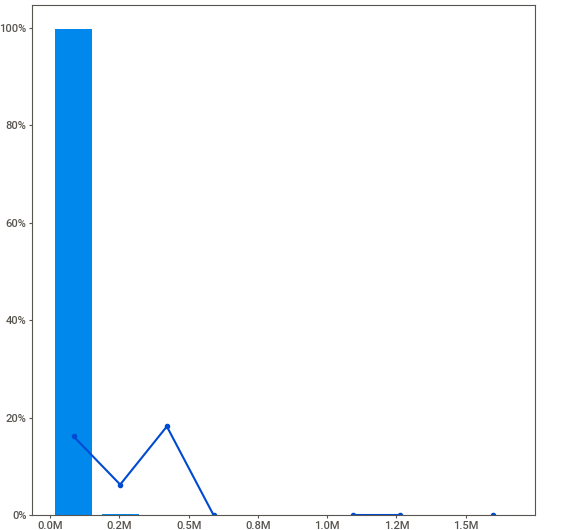
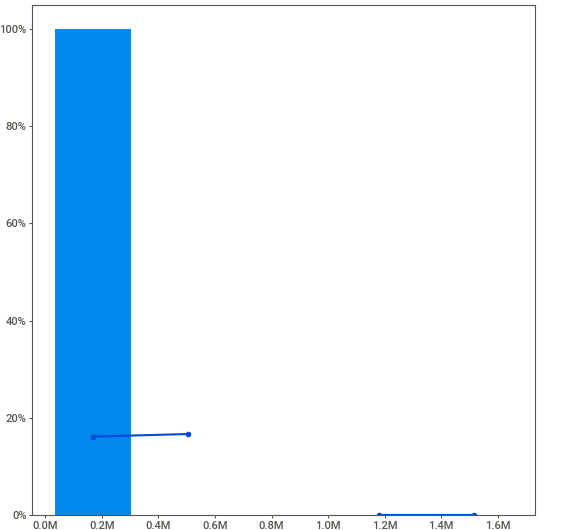
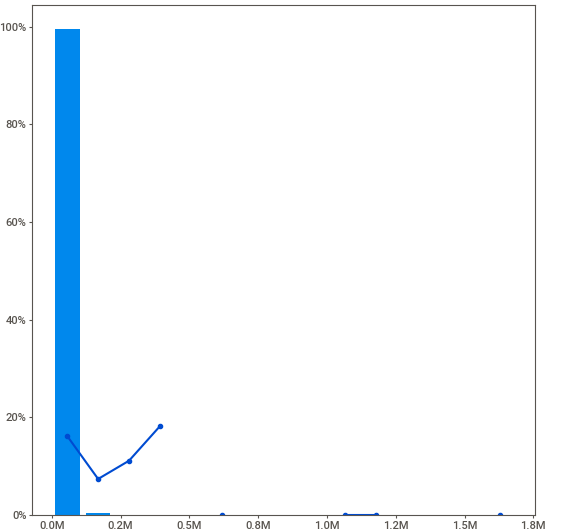
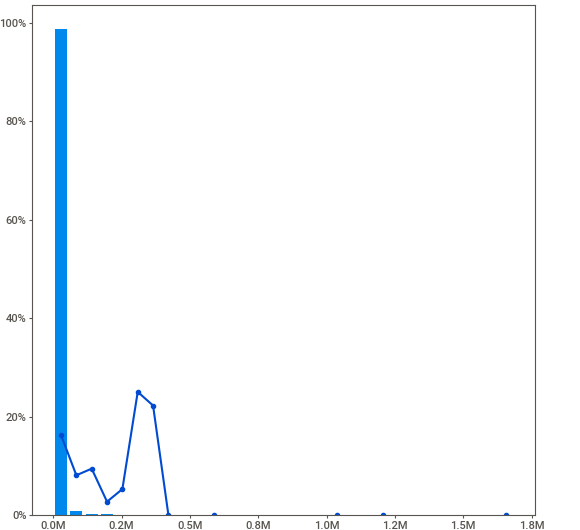
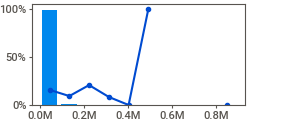
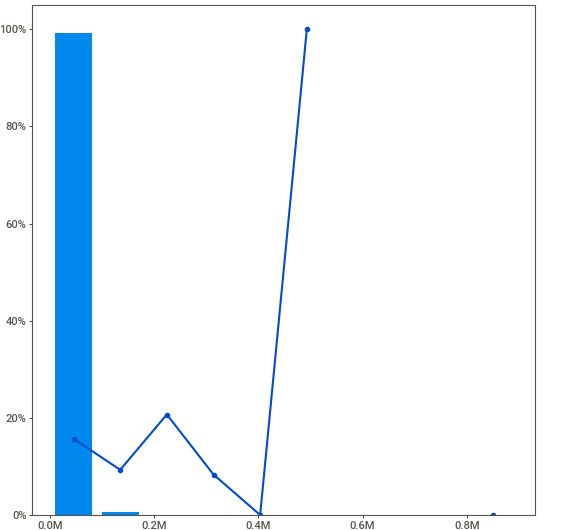
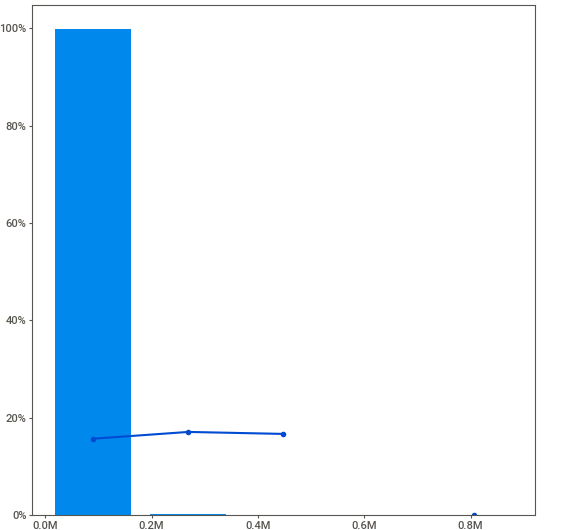
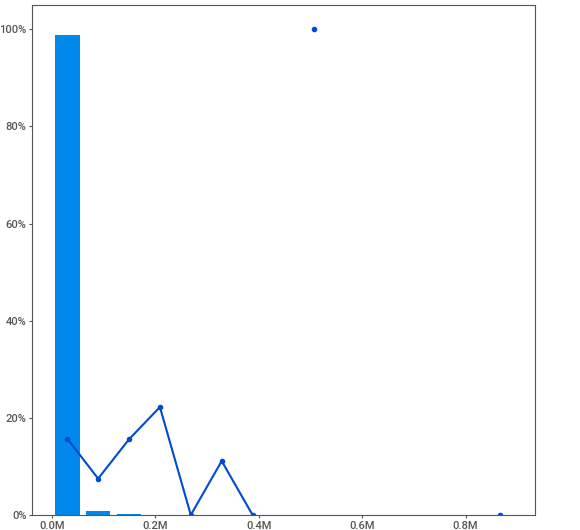
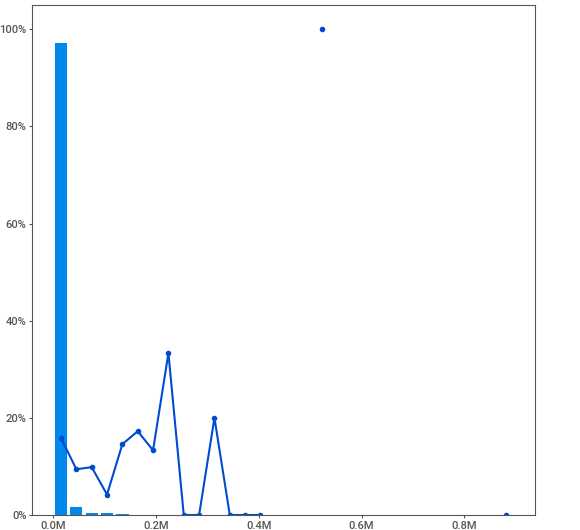
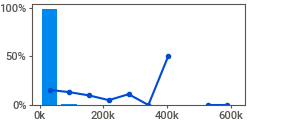
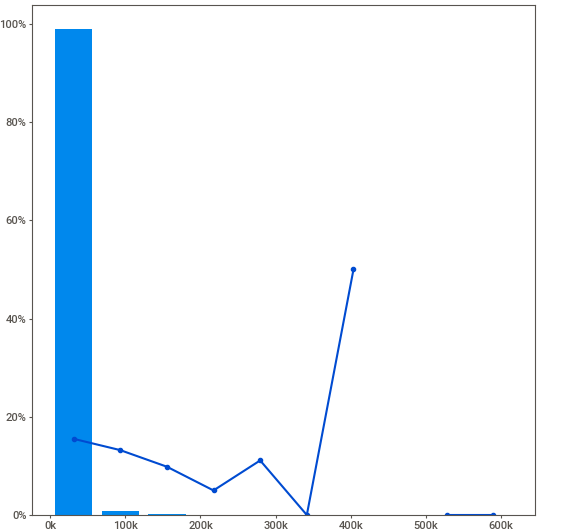
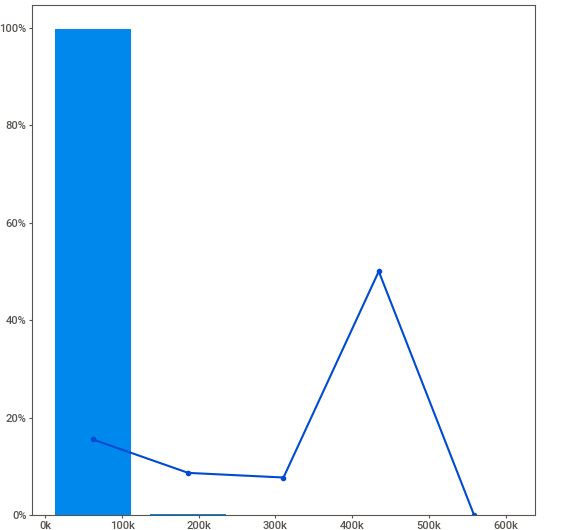
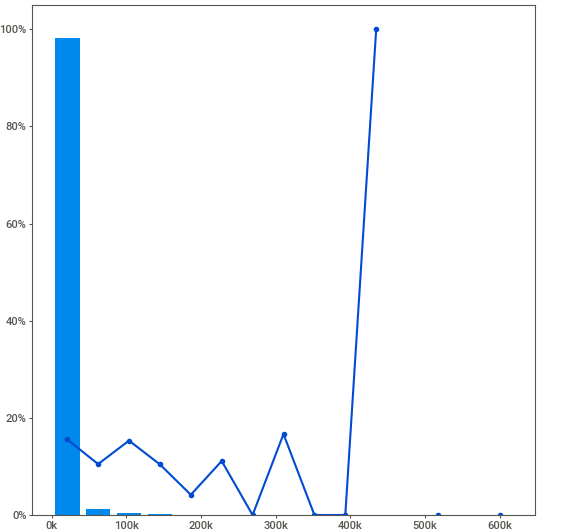
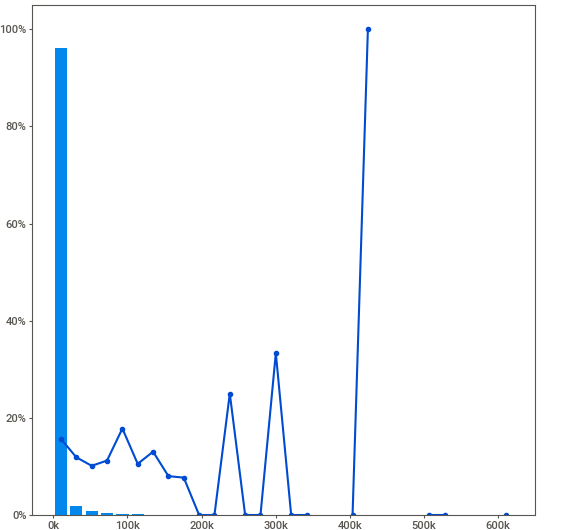
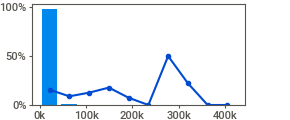
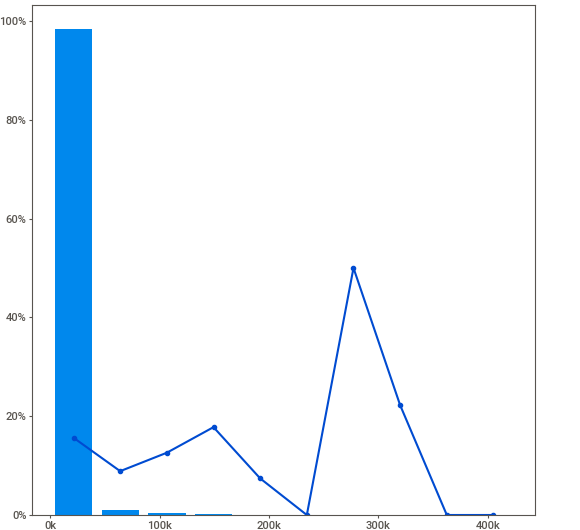
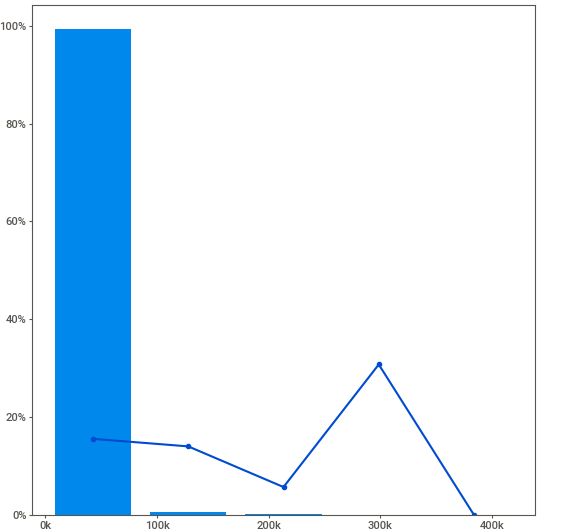
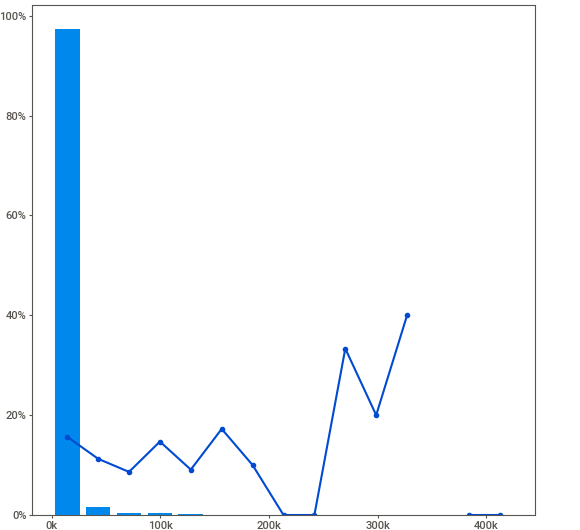
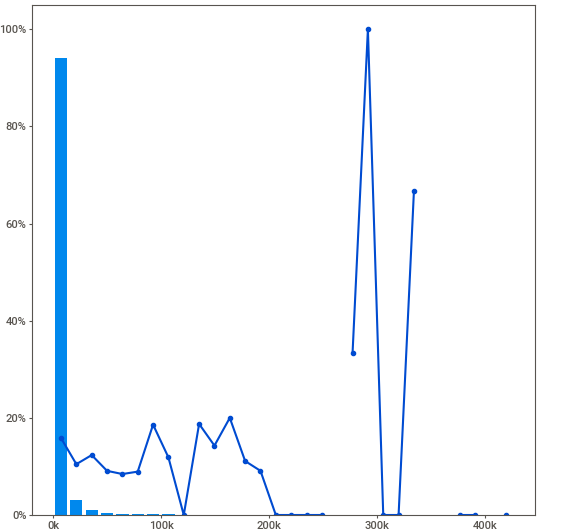
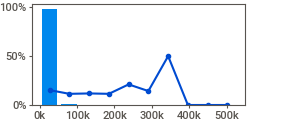
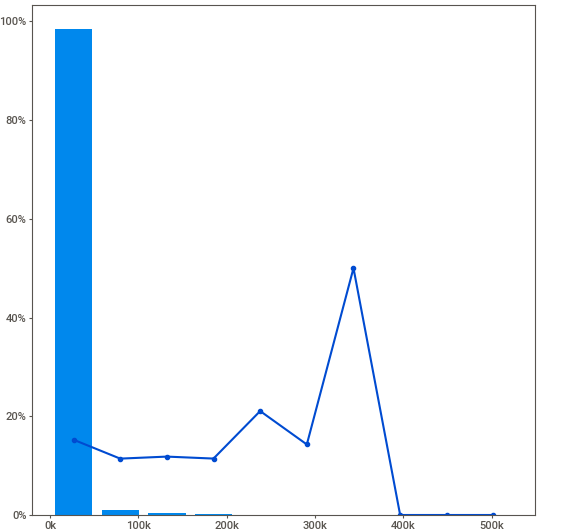
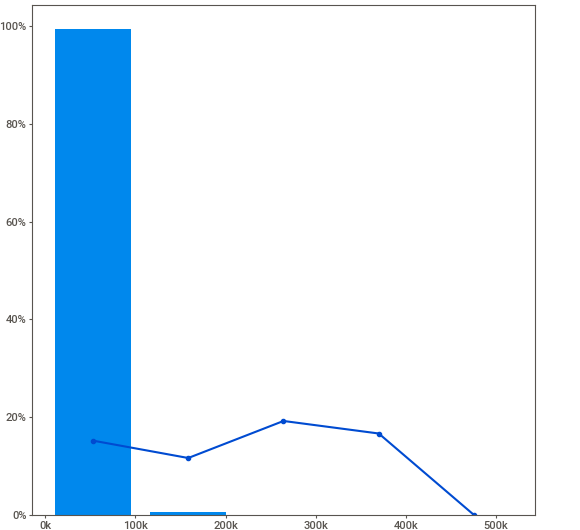
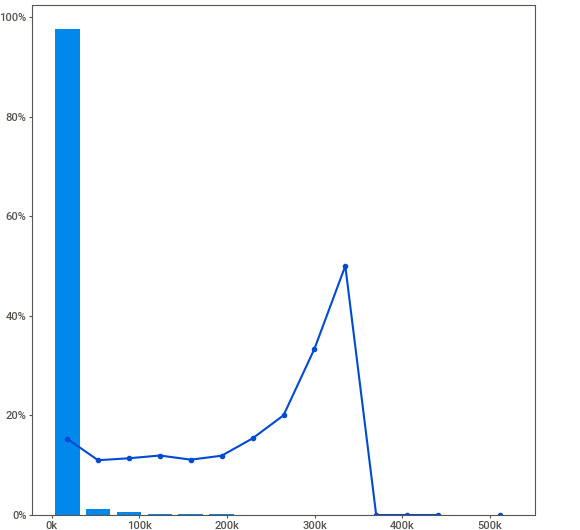
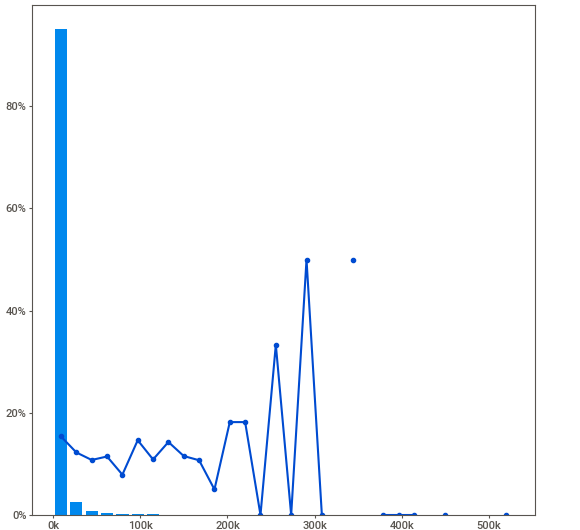
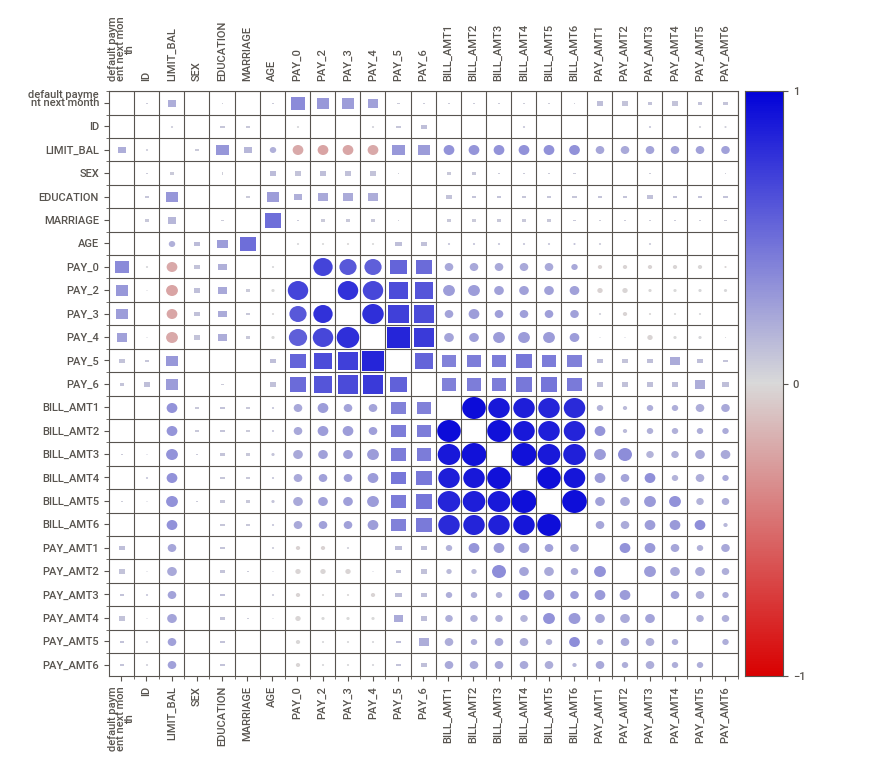
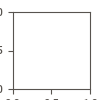

In [ ]:
report = sv.analyze(data, "default payment next month") #Especificamos la variable target para el análisis
report.show_notebook( )

Según el reporte de estadísticas descriptivas nos resulta llamativo:   

La variable **LIMIT_BAL** que representa el monto del crédito otorgado toma como valor máximo 1.000.000, tiene un desvío estandar de 130.000 y una media de 140.000.
  
La variable **AGE** tiene como valor máximo 79, como media 34, desvío estandar 9.2 y mínimo de 21 años.
  
Las variables **BILL_AMT{i}** con i=(1, 2, 3, 4, 5, 6) que representa el monto del estado de cuenta correspondiente a los meses de Septiembre, Agosto, Julio, Junio, Mayo y Abril respectivamente tiene valores máximos entre 900.000 y 1.700.000, desvío estandar entorno a los 60.000 y valores mínimos en algunos casos que toman valores negativos.
  

Las variables **PAY_AMT{i}** con i=(1, 2, 3, 4, 5, 6) que representa el monto de pagos previos correspondiente a los meses de Septiembre, Agosto, Julio, Junio, Mayo y Abril respectivamente tiene valores máximos entre 529.000 y 1.700.000, desvío estandar entorno a los 17.000 y valores mínimos de 0.

# Composición del dataset

Vemos la proporción de positivos. De forma de conocer como está balanceado el dataset

In [ ]:
data['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

Proporción de positivos

In [ ]:
6636 / ( 23364 + 6636)

0.2212

# Feature engineering

Vemos que las variables **BILL_AMT{i}** con i=(1, 2, 3, 4, 5, 6) tienen observaciones con valores negativos.

In [ ]:
variables = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for variable in variables:
  count_negatives = (data[variable] < 0 ).sum()
  print(f' Valores negativos variable:', variable, count_negatives)


 Valores negativos variable: BILL_AMT1 590
 Valores negativos variable: BILL_AMT2 669
 Valores negativos variable: BILL_AMT3 655
 Valores negativos variable: BILL_AMT4 675
 Valores negativos variable: BILL_AMT5 655
 Valores negativos variable: BILL_AMT6 688


In [ ]:
for variable in variables:
  data[variable] = data[variable].where(data[variable] >= 0, 0)

Vamos a aplicar logaritmo sobre las variables de montos **BILL_AMT{i}** y **PAY_AMT{i}** que además tienen valores muy extremos comparados con su media como se puede ver en el reporte.   
El objetivo es entonces convertirlas a una escala común reduciendo así la influencia de los valores extremos.

In [ ]:
variables = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ]


for variable in variables:
    data[variable] = data[variable].apply(np.log1p)


data


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6   PAY_AMT1   PAY_AMT2  \
0         -1  ...   0.000000   0.000000   0.000000   0.000000   6.536692   
1          0  ...   8.093462   8.147867   8.090096   0.000000   6.908755   
2          0  ...   9.570250   9.612400   9.651816   7.325808   7.313887   
3          0  ...  10.251147  10.273671  10.293771   7.601402   7.610853   
4          0  ...   9.949464   9.859901   9.859118   7.601402  10.510041   
...      ...  ...        ...        ...        ...        ...        ...   
29995      0  ...  11.385149  10.349391   9.679156   9.047939   9.903538   
29996     -1  ...   9.102755   8.554682   0.000000   7.516433   8.168203   
29997     -1  ...   9.946499   9.932221   9.870861   0.000000   0.000000   
29998      0  ...  10.873793   9.380589  10.798452  11.360951   8.134468   
29999      0  ...  10.506053  10.386808   9.636523   7.639642   7.496097   

       PAY_AMT3  PAY_AMT4   PAY_AMT5  PAY_AMT6  default payment next month  
0      0.000000  0.000000   0.000000  0.000000                           1  
1      6.908755  6.908755   0.000000  7.601402                           1  
2      6.908755  6.908755   6.908755  8.517393                           0  
3      7.090910  7.003974   6.975414  6.908755                           0  
4      9.210440  9.105091   6.536692  6.522093                           0  
...         ...       ...        ...       ...                         ...  
29995  8.517993  8.022241   8.517393  6.908755                           0  
29996  9.104869  4.867534   0.000000  0.000000                           0  
29997  9.998843  8.343078   7.601402  8.039480                           1  
29998  7.072422  7.563720  10.877387  7.498316                           1  
29999  7.266129  6.908755   6.908755  6.908755                           1  

[30000 rows x 25 columns]

In [ ]:
import numpy as np

Vamos a transformar algunas variables. Comenzamos con las variables categóricas.




La variable ***EDUCATION*** que según la información provista en el dataset se clasifica que la siguiente manera:


*   1 = graduate school
*   2 = university
*   3 = high school
*   4 = others



In [ ]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Los valores 0 y 6 que no están etiquetados en ningún nivel educativo los vamos a incluir en la categoría 4 = "others".  

In [ ]:
condicion = (data.EDUCATION == 0) | (data.EDUCATION == 5) | (data.EDUCATION == 6)
data.loc[condicion, 'EDUCATION'] = 4

La variable **MARRIAGE** que se clasifica de la siguiente manera:



*  1 = married
*  2 = single
*  3 = others



In [ ]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Los valores 0 que no están etiquetados los vamos a incluir en la categoría 3 = others.

In [ ]:
data.loc[data.MARRIAGE == 0, 'MARRIAGE'] = 3

Para ordenarlas mejor renombramos la variable **PAY_0** y la llamamos **PAY_1**.

In [ ]:
data = data.rename(columns={'PAY_0': 'PAY_1'} )


Las variables **PAY_i** con i=(1, 2, 3, 4, 5, 6) que se identifican según:

*  **PAY_1** Estado de pago en Septiembre de 2005
*  **PAY_2** Estado de pago en Agosto de 2005
*  **PAY_3** Estado de pago en Julio de 2005
*  **PAY_4** Estado de pago en Junio de 2005
*  **PAY_5** Estado de pago en Mayo de 2005
*  **PAY_6** Estado de pago en Abril de 2005

Y se clasifican según:

*  -1 = Pago apropiado
*   1 = Retraso de un mes en el pago
*   2 = Retraso de dos meses en el pago
*   3 = Retraso de tres meses en el pago
* ...
*   8 = Retraso de ocho meses en el pago









In [ ]:
for i in range(1, 7): print(data['PAY_{}'.format(i)].value_counts())

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64


Vemos que las variables toman valores 0 y -2 que no están clasificados. Para esto tenemos en que cuenta que 0 implica que no hay meses de atraso en el pago. Además interpretamos que -2 puede deberse a un error en la carga cuando en realidad correspondería -1. Es por esto que decidimos unificar las observaciones que tomen los valores -2 y -1 en 0.   
  
Entonces las variables **PAY_i** quedarían clasificadas de la siguiente forma:
*   0 = Pago apropiado
*   1 = Retraso de un mes en el pago
*   2 = Retraso de dos meses en el pago
*   3 = Retraso de tres meses en el pago
* ...
*   8 = Retraso de ocho meses en el pago





In [ ]:
condicion = (data.PAY_1 == -1) | (data.PAY_1 == -2)
data.loc[condicion, 'PAY_1' ]=0
condicion = (data.PAY_2 == -1) | (data.PAY_2 == -2)
data.loc[condicion, 'PAY_2' ]=0
condicion = (data.PAY_3 == -1) | (data.PAY_3 == -2)
data.loc[condicion, 'PAY_3' ]=0
condicion = (data.PAY_4 == -1) | (data.PAY_4 == -2)
data.loc[condicion, 'PAY_4' ]=0
condicion = (data.PAY_5 == -1) | (data.PAY_5 == -2)
data.loc[condicion, 'PAY_5' ]=0
condicion = (data.PAY_6 == -1) | (data.PAY_6 == -2)
data.loc[condicion, 'PAY_6' ]=0

# Regresión logistica

In [ ]:
y = data.loc[:, data.columns == 'default payment next month'].copy()
X = data.loc[:, data.columns != 'default payment next month'].copy()

# Partición en conjunto de test y train. 80% para entrenamiento y 20% para test. Fijamos una semilla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Instanciamos el modelo con una semilla
logit_model = sm.Logit(y_train, X_train)

# Entrenamiento
logit_model = logit_model.fit()

# Perfomance del modelo
logit_predictions = logit_model.predict(X_test)

# Definimos un umbral para las predicciones
logit_predictions_binary = logit_predictions > 0.5

# Metricas
roc = roc_auc_score(y_test, logit_predictions_binary)
acc = accuracy_score(y_test, logit_predictions_binary)
prec = precision_score(y_test, logit_predictions_binary)
rec = recall_score(y_test, logit_predictions_binary)
f1 = f1_score(y_test, logit_predictions_binary)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, roc]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score',
                               'ROC'])

results

Optimization terminated successfully.
         Current function value: 0.442678
         Iterations 6


Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Logistic Regression  0.816167   0.673267  0.310739  0.425221  0.634247

In [ ]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                24000
Model:                                  Logit   Df Residuals:                    23976
Method:                                   MLE   Df Model:                           23
Date:                        Mon, 06 Nov 2023   Pseudo R-squ.:                  0.1634
Time:                                13:51:00   Log-Likelihood:                -10624.
converged:                               True   LL-Null:                       -12700.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ID         -5.298e-07   1.99e-06     -0.266      0.790   -4.43e-06    3.37e-06
LIMIT_BAL  -1.772e-06   1.62e-07    -10.931      0.000   -2.09e-06   -1.45e-06
SEX           -0.2089      0.031     -6.662      0.000      -0.270      -0.147
EDUCATION     -0.0899      0.024     -3.685      0.000      -0.138      -0.042
MARRIAGE      -0.2707      0.028     -9.602      0.000      -0.326      -0.215
AGE        -8.177e-05      0.002     -0.050      0.960      -0.003       0.003
PAY_1          0.8529      0.029     29.650      0.000       0.796       0.909
PAY_2         -0.0049      0.040     -0.123      0.902      -0.083       0.073
PAY_3          0.0615      0.043      1.437      0.151      -0.022       0.145
PAY_4          0.0409      0.044      0.933      0.351      -0.045       0.127
PAY_5          0.0722      0.046      1.576      0.115      -0.018       0.162
PAY_6          0.1634      0.039      4.143      0.000       0.086       0.241
BILL_AMT1     -0.0040      0.008     -0.484      0.629      -0.020       0.012
BILL_AMT2      0.0030      0.012      0.246      0.806      -0.021       0.027
BILL_AMT3      0.0381      0.013      2.999      0.003       0.013       0.063
BILL_AMT4      0.0300      0.012      2.475      0.013       0.006       0.054
BILL_AMT5     -0.0170      0.012     -1.465      0.143      -0.040       0.006
BILL_AMT6      0.0264      0.011      2.317      0.020       0.004       0.049
PAY_AMT1      -0.0388      0.010     -3.879      0.000      -0.058      -0.019
PAY_AMT2      -0.0491      0.010     -4.732      0.000      -0.069      -0.029
PAY_AMT3      -0.0511      0.010     -5.350      0.000      -0.070      -0.032
PAY_AMT4      -0.0303      0.009     -3.308      0.001      -0.048      -0.012
PAY_AMT5      -0.0156      0.009     -1.656      0.098      -0.034       0.003
PAY_AMT6      -0.0112      0.006     -1.782      0.075      -0.024       0.001
==============================================================================
"""

In [ ]:
confusion_matrix = confusion_matrix(y_test, logit_predictions_binary)
print(confusion_matrix)

[[4489  198]
 [ 905  408]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

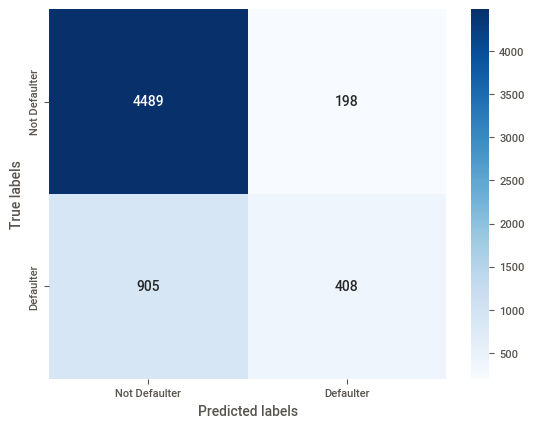

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix, cmap="Blues",annot=True, fmt=".0f", ax = ax)

# etiquetas
labels = ['Not Defaulter', 'Defaulter']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Random forest

In [ ]:
y1 = data.loc[:, data.columns == 'default payment next month'].copy()
X1 = data.loc[:, data.columns != 'default payment next month'].copy()

# Partición en conjunto de test y train. 80% para entrenamiento y 20% para test. Fijamos una semilla
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
# Instanciamos el modelo con una semilla

arbol = DecisionTreeClassifier(criterion= 'gini', max_depth=5, ccp_alpha=0, random_state=10)

arbol.fit(X_train, y_train)

arbol_predictions = arbol.predict(X_train)

arbol_predictions_binary = arbol_predictions > 0.5

In [ ]:
accuracy_score(y_train, arbol_predictions)

0.8250833333333333

In [ ]:
# veamos que tan bien le fue a este modelo
print(classification_report(y_true=y_test,y_pred=arbol.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000



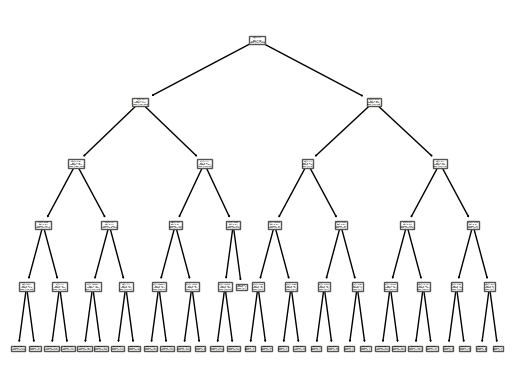

In [ ]:
plot_tree(arbol);

Vamos a estimar los mejores hiperpárametros del árbol mediante grid search

In [ ]:
# Definir la cuadrícula de hiperparámetros para explorar

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'ccp_alpha': [0, 0.001, 0.01, 0.1]
}

# Instanciar el modelo de árbol de decisión
arbol = DecisionTreeClassifier(random_state=10)

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(arbol, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados por GridSearchCV
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Crear un nuevo modelo con los mejores hiperparámetros
best_arbol = DecisionTreeClassifier(**best_params, random_state=10)

# Ajustar el nuevo modelo a los datos de entrenamiento
best_arbol.fit(X_train, y_train)

# Realizar predicciones con el nuevo modelo
arbol_predictions = best_arbol.predict(X_train)

Mejores hiperparámetros encontrados: {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 5}


A partir de la optimización de hiperparámetros después de realizar el GridSearch entrenamos un nuevo árbol

In [ ]:
arbol = DecisionTreeClassifier(criterion ='entropy', max_depth=5, ccp_alpha=0, random_state=10)

arbol.fit(X_train, y_train)

arbol_predictions = arbol.predict(X_train)

arbol_predictions_binary = arbol_predictions > 0.5

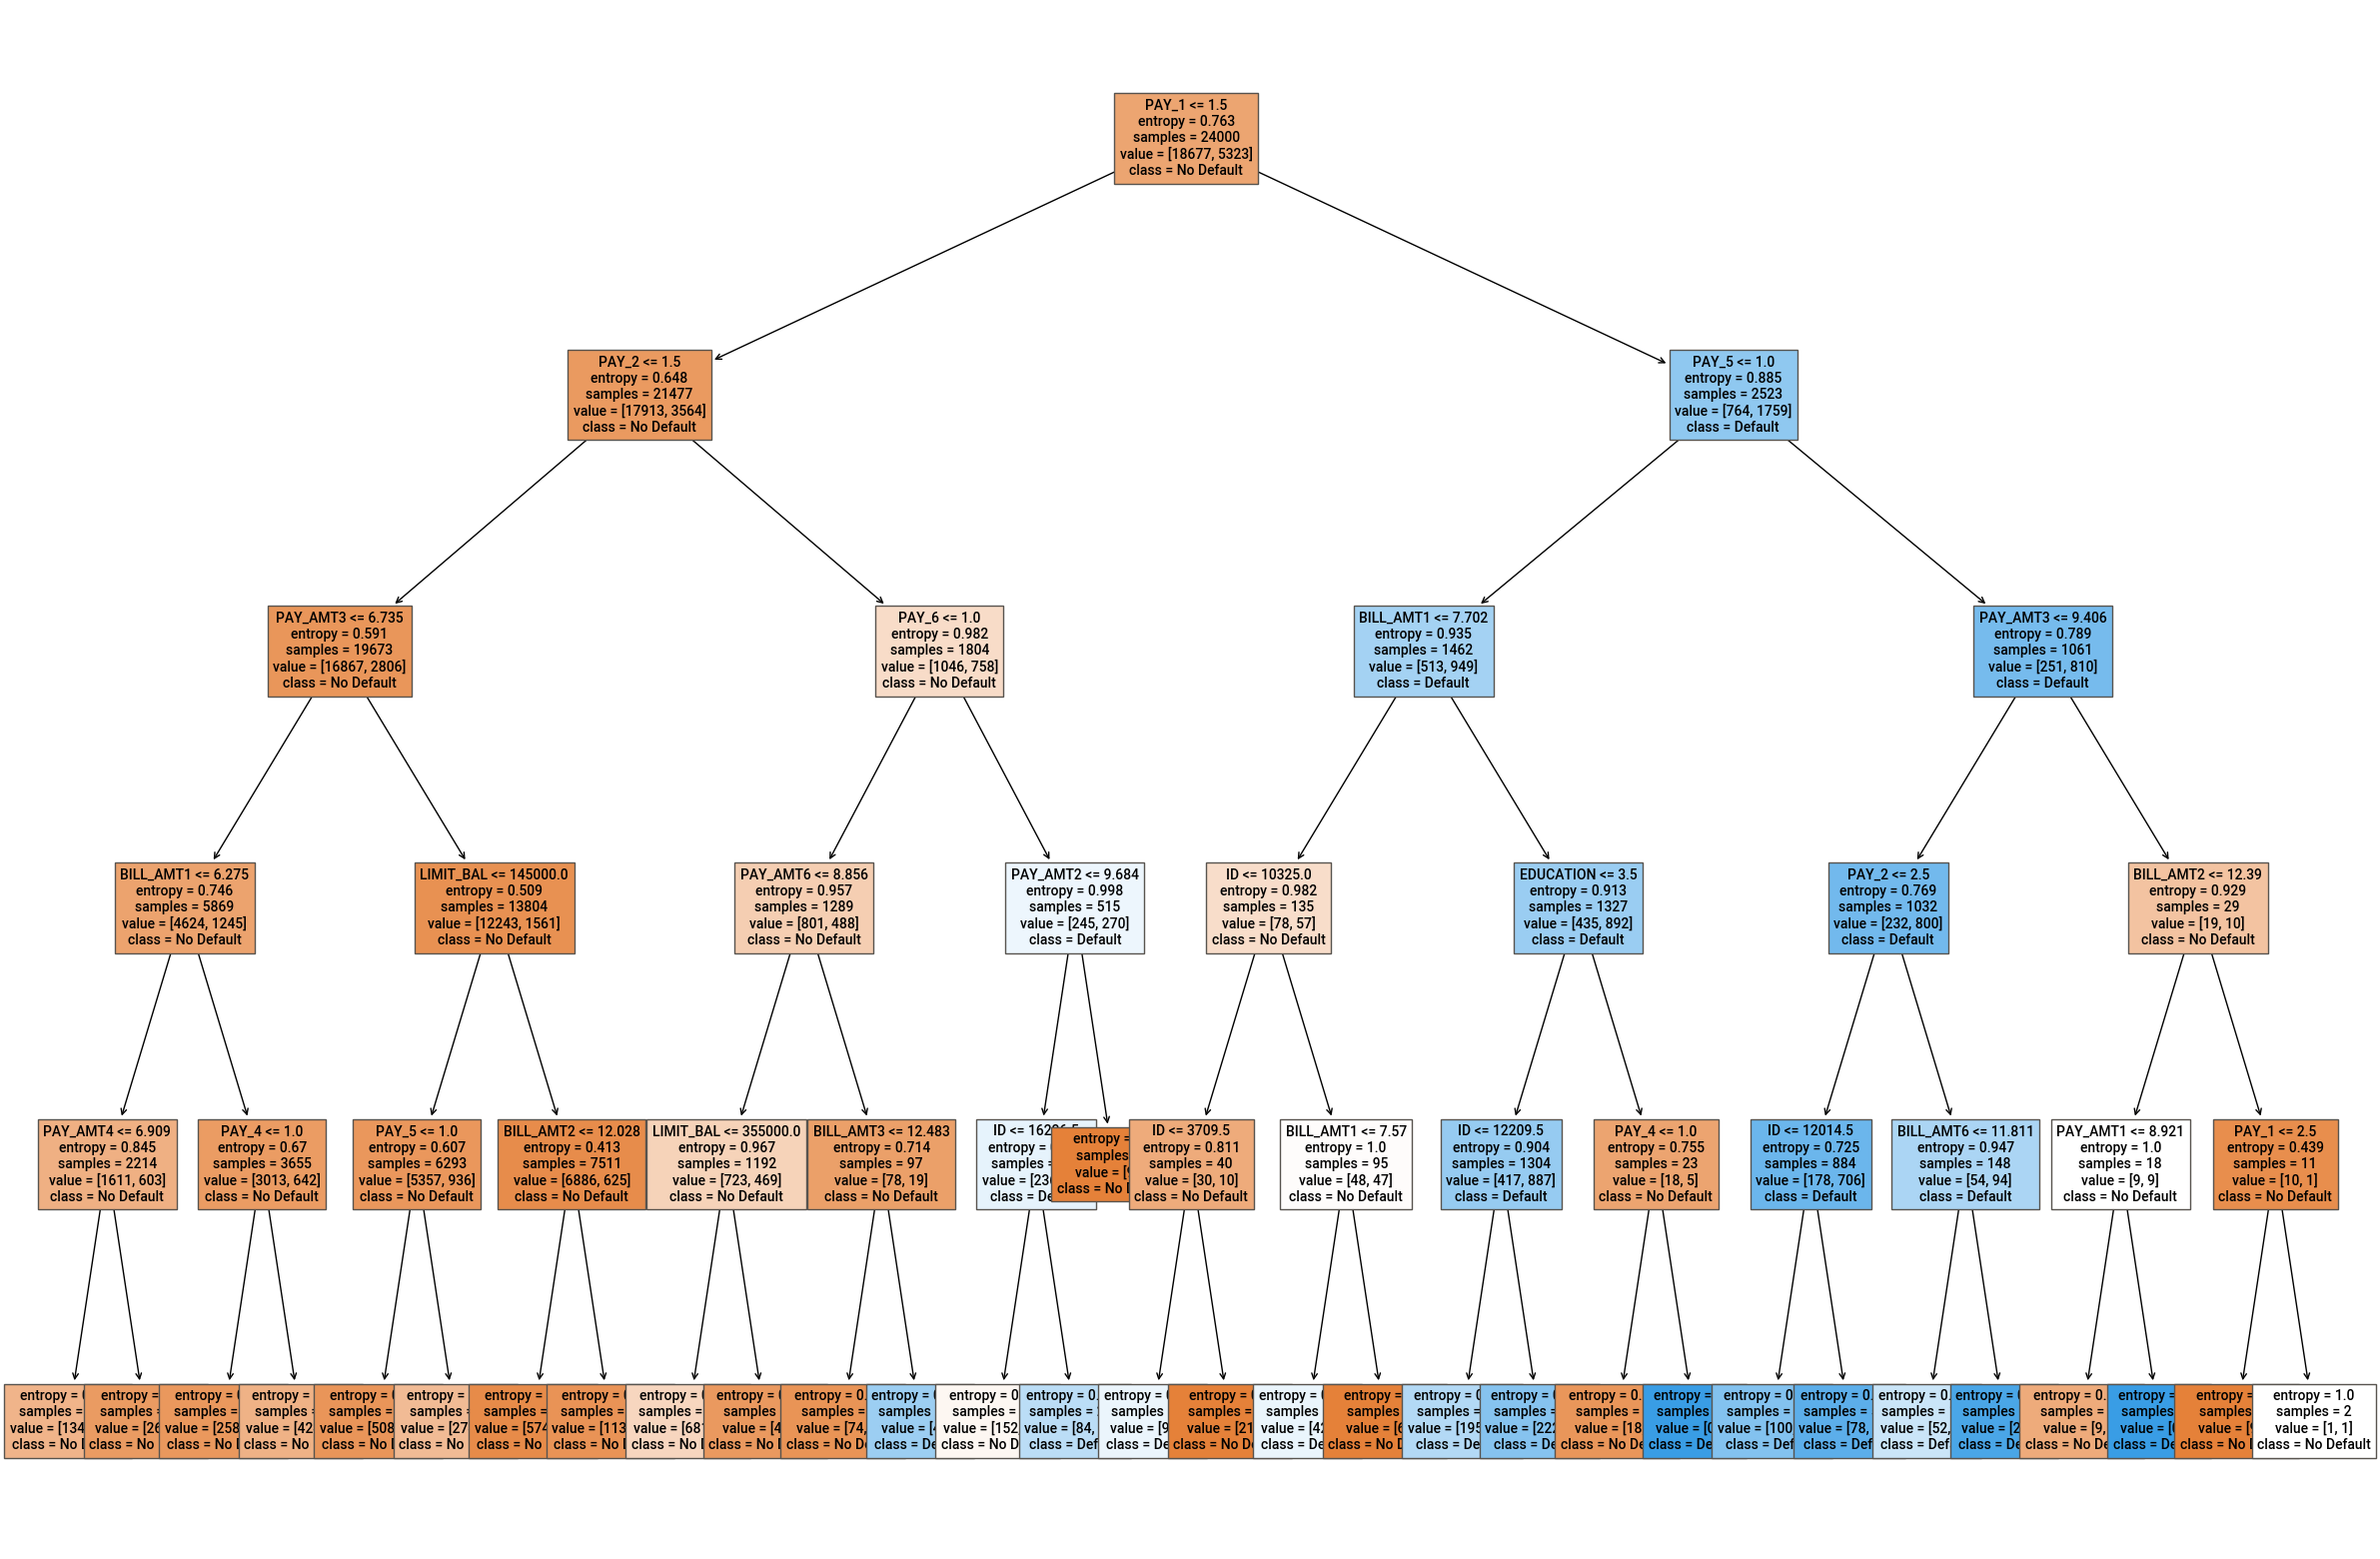

In [ ]:
plt.figure(figsize=(30, 20))  # Aumenta el ancho y el alto de la figura

plot_tree(best_arbol, filled=True, feature_names=X_train.columns, class_names=["No Default", "Default"], fontsize=10)

plt.show()

In [ ]:
arbol_predictions_test = best_arbol.predict(X_test)

report = classification_report(y_true=y_test, y_pred=arbol_predictions_test)

print(report)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.34      0.45      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
from sklearn.metrics import roc_curve


In [ ]:
# Calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, arbol_predictions_test)

# Calculamos el valor de AUC (Area Under the Curve)
auc = roc_auc_score(y_test, arbol_predictions_test)
print("AUC:", auc)


AUC: 0.6468583762415236
